In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# to reduce amount of repeating code from notebook to another there is a lib of
#often used functions called
import sys
sys.path.insert(0, "C:/workspace/data-science/perpetual/second_investigation_wave")
from data_transformers import *

# Collecting FTX prices for 2021 minutewise

In [2]:
eth_ftx_price_df = pd.read_csv("eth_ftx_price_2021.csv")
eth_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

btc_ftx_price_df = pd.read_csv("btc_ftx_price_2021.csv")
btc_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

perp_ftx_price_df = pd.read_csv("perp_ftx_price_2021.csv")
perp_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
eth_ftx_price_df["datetime"] = pd.to_datetime(eth_ftx_price_df["time"])
eth_ftx_price_df["day_of_year"] = eth_ftx_price_df["datetime"].dt.dayofyear
eth_ftx_price_df["hour"] = eth_ftx_price_df["datetime"].dt.hour
eth_ftx_price_df["minute"] = eth_ftx_price_df["datetime"].dt.minute
eth_ftx_price_df.drop(columns=["startTime", "time"], inplace=True)
eth_ftx_price_df

open     high      low    close        volume            datetime  \
0        737.28   737.91   736.90   737.80    9917.16625 2021-01-01 00:00:00   
1        737.80   739.92   737.80   739.53   30086.73403 2021-01-01 00:01:00   
2        739.53   740.00   738.21   738.75     257.16222 2021-01-01 00:02:00   
3        738.75   739.10   738.14   738.14     185.36104 2021-01-01 00:03:00   
4        738.14   738.63   737.62   737.78     178.66611 2021-01-01 00:04:00   
...         ...      ...      ...      ...           ...                 ...   
525875  3677.30  3678.90  3677.20  3677.40   96718.27870 2021-12-31 23:56:00   
525876  3677.40  3679.30  3677.40  3677.70   35194.77190 2021-12-31 23:57:00   
525877  3677.70  3678.60  3672.60  3675.50  293073.79940 2021-12-31 23:58:00   
525878  3675.50  3678.60  3675.20  3676.50  138598.98440 2021-12-31 23:59:00   
525879  3676.50  3687.20  3676.50  3684.90  766040.96930 2022-01-01 00:00:00   

        day_of_year  hour  minute  
0                 1     0       0  
1                 1     0       1  
2                 1     0       2  
3                 1     0       3  
4                 1     0       4  
...             ...   ...     ...  
525875          365    23      56  
525876          365    23      57  
525877          365    23      58  
525878          365    23      59  
525879            1     0       0  

[525880 rows x 9 columns]

In [4]:
btc_ftx_price_df["datetime"] = pd.to_datetime(btc_ftx_price_df["time"])
btc_ftx_price_df["day_of_year"] = btc_ftx_price_df["datetime"].dt.dayofyear
btc_ftx_price_df["hour"] = btc_ftx_price_df["datetime"].dt.hour
btc_ftx_price_df["minute"] = btc_ftx_price_df["datetime"].dt.minute
btc_ftx_price_df.drop(columns=["time"], inplace=True)
btc_ftx_price_df

open     high      low    close        volume            datetime  \
0       28965.0  29014.5  28960.0  29014.5  1.468796e+05 2021-01-01 00:00:00   
1       29014.5  29070.5  29014.5  29065.5  5.276008e+05 2021-01-01 00:01:00   
2       29065.5  29066.0  29018.0  29041.5  1.813415e+05 2021-01-01 00:02:00   
3       29041.5  29050.5  29022.0  29028.0  3.602541e+05 2021-01-01 00:03:00   
4       29028.0  29040.5  29021.5  29022.0  2.229805e+05 2021-01-01 00:04:00   
...         ...      ...      ...      ...           ...                 ...   
525872  46244.0  46270.0  46238.0  46242.0  1.430735e+05 2021-12-31 23:56:00   
525873  46242.0  46269.0  46236.0  46237.0  1.526918e+05 2021-12-31 23:57:00   
525874  46237.0  46237.0  46136.0  46179.0  1.191280e+06 2021-12-31 23:58:00   
525875  46179.0  46225.0  46177.0  46199.0  2.645854e+05 2021-12-31 23:59:00   
525876  46199.0  46267.0  46199.0  46247.0  4.644578e+05 2022-01-01 00:00:00   

        day_of_year  hour  minute  
0                 1     0       0  
1                 1     0       1  
2                 1     0       2  
3                 1     0       3  
4                 1     0       4  
...             ...   ...     ...  
525872          365    23      56  
525873          365    23      57  
525874          365    23      58  
525875          365    23      59  
525876            1     0       0  

[525877 rows x 9 columns]

In [5]:
perp_ftx_price_df["datetime"] = pd.to_datetime(perp_ftx_price_df["time"])
perp_ftx_price_df["day_of_year"] = perp_ftx_price_df["datetime"].dt.dayofyear
perp_ftx_price_df["hour"] = perp_ftx_price_df["datetime"].dt.hour
perp_ftx_price_df["minute"] = perp_ftx_price_df["datetime"].dt.minute
perp_ftx_price_df.drop(columns=["time"], inplace=True)
perp_ftx_price_df

open   high    low  close     volume            datetime  \
0       4.609  4.624  4.609  4.624  1120.2155 2021-03-01 00:00:00   
1       4.624  4.655  4.624  4.645   937.8225 2021-03-01 00:01:00   
2       4.645  4.648  4.635  4.635   321.7042 2021-03-01 00:02:00   
3       4.635  4.635  4.629  4.629   481.6378 2021-03-01 00:03:00   
4       4.629  4.629  4.620  4.624   591.0764 2021-03-01 00:04:00   
...       ...    ...    ...    ...        ...                 ...   
525878  4.690  4.694  4.690  4.694    22.0618 2022-02-28 23:56:00   
525879  4.694  4.707  4.694  4.699    44.6969 2022-02-28 23:57:00   
525880  4.699  4.712  4.699  4.712   236.5224 2022-02-28 23:58:00   
525881  4.712  4.712  4.708  4.708     0.0000 2022-02-28 23:59:00   
525882  4.708  4.714  4.700  4.706   150.7385 2022-03-01 00:00:00   

        day_of_year  hour  minute  
0                60     0       0  
1                60     0       1  
2                60     0       2  
3                60     0       3  
4                60     0       4  
...             ...   ...     ...  
525878           59    23      56  
525879           59    23      57  
525880           59    23      58  
525881           59    23      59  
525882           60     0       0  

[525883 rows x 9 columns]

# Define plots

In [6]:
def plot_minutewise_pnl_to_high_low_price(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                   perp_minutewise_price_df: pd.DataFrame, token_name: str):
    """show minutewise pnl results respective to the minutewise mean price from FTX and Perpetual platforms

    Args:
    changes_token_df (pd.DataFrame): position changes with specific token
    ftx_price_df (pd.DataFrame): FTX high and low token price story per minute
    perp_minutewise_price_df (pd.DataFrame): Perpetual high and low price story per minute
    token_name (str): name of the token
    """
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]

    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]).min(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])

    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]

    fig, ax = plt.subplots(figsize=(25, 10))
    ax2 = ax.twinx()
    ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
          label="collected profits per minute")
    ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
          label="collected losses per minute")

    ax2.plot(ftx_price_df["datetime"], ftx_price_df["high"], color='b', label='FTX high price')
    ax2.plot(ftx_price_df["datetime"], ftx_price_df["low"], color='midnightblue', label='FTX low price')
    ax2.plot(perp_minutewise_price_df["time"], perp_minutewise_price_df["high"], color='orange', label="Perpetual high price")
    ax2.plot(perp_minutewise_price_df["time"], perp_minutewise_price_df["low"], color='orangered', label="Perpetual low price")

    max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
    min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Price in USD")
    ax.set_title("Daily sum of profits and losses relative to daily mean price for " + token_name + "/USD")
    fig.legend()
    plt.xticks(rotation=45)
    plt.show()

    
        
def plot_minutewise_pnl_to_mean_price(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                   perp_minutewise_price_df: pd.DataFrame, token_name: str):
    """show cumulative pnl respective to the daily mean price of the token with prices from
    Uniswap, Perpetual and FTX platforms

    Args:
    changes_token_df (pd.DataFrame): position changes for specific token during specific year
    ftx_price_df (pd.DataFrame): FTX-based price of token in USD
    perp_minutewise_price_df (pd.DataFrame): Perpetual price of token in USD
    token_name (str): name of the token
    """
    #      -------------------------          data preparation stage      ------------------------------------------------
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]

    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]
                                                                                       ).min().sort_values(by=["day_of_year",
                                                                                                     "hour", "minute"])

    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]
    #      ----------------------------------------------------------------------------------------------------------------

    #      ------------------------------     making a chart       --------------------------------------------------------
    fig, ax = plt.subplots(figsize=(25, 10))
    ax2 = ax.twinx()
    ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
          label="collected profits per minute")
    ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
          label="collected losses per minute")
    ax2.plot(ftx_price_df["datetime"], (ftx_price_df["high"] + ftx_price_df["low"]) / 2, color='b', label='FTX price')
    ax2.plot(perp_minutewise_price_df["time"], (perp_minutewise_price_df["high"] + perp_minutewise_price_df["low"]) / 2, 
          color='orange', label="Perpetual price")

    max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
    min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax.set_title("Daily sum of profits and losses relative to daily mean price for " + token_name + "/USD")
    fig.legend()
    plt.xticks(rotation=45)
    plt.show()
       
     
    
def plot_minutewise_pnl_to_mean_price_difference(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                                 perp_minutewise_price_df: pd.DataFrame, token_name: str, separate_plots: bool=False,
                                                 xsize: int=25, ysize: int=10):
    """show cumulative pnl respective to the daily mean price of the token with prices from
    Uniswap, Perpetual and FTX platforms

    Args:
    changes_token_df (pd.DataFrame): position changes for specific token during specific year
    ftx_price_df (pd.DataFrame): FTX-based price of token in USD
    perp_minutewise_price_df (pd.DataFrame): Perpetual price of token in USD
    token_name (str): name of the token
    separate_plots (bool): is it required to separate price difference plot and
                        pnl plot or it can be shown in one. Default is False
    """
    #      -------------------------          data preparation stage      ------------------------------------------------
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]
    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]
                                                                                       ).min().sort_values(by=["day_of_year",
                                                                                                     "hour", "minute"])

    # sum extracted by traders profits and losses per each minute separately                                                                   
    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]

    # combine price stories of the FTX and Perpetual
    perp_ftx_price_df = ftx_price_df.join(perp_minutewise_price_df.rename(columns={"high": "perp_high", "low": "perp_low"}))
    perp_ftx_price_df.dropna(inplace=True)
    #      -----------------------------------------------------------------------------------------------------------------

    #      ---------------------------------------   make a chart  ---------------------------------------------------------
    if not separate_plots:
        fig, ax = plt.subplots(figsize=(xsize, ysize))
        ax2 = ax.twinx()
        ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
             label="collected profits per minute")
        ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
             label="collected losses per minute")
        ax2.plot(perp_ftx_price_df["time"], ((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                         (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2),
             color='magenta', linestyle=":", label="price difference Perp and FTX")

        max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

        max_positive_price_diff = abs((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                                (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2).max()
        max_negative_price_diff = abs((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                                (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2).min()
        max_price_diff = max_positive_price_diff if max_positive_price_diff > max_negative_price_diff else max_negative_price_diff

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylim(-max_price_diff * 1.05, max_price_diff * 1.05)
        ax2.set_ylabel("Count of traders")
        ax.set_title("Daily sum of profits and losses relative to daily mean price difference for " + token_name + "/USD")
        fig.legend()
        plt.xticks(rotation=45)
        plt.show()
        return
    else:
        # make a preparation of the overall chart
        fig = plt.figure(figsize=(xsize, ysize))
        
        # make first half of chart with pnl
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
             label="collected profits per minute")
        ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
             label="collected losses per minute")
        ax.set_xlabel("time")
        ax.set_ylabel("pnl in USD")
        ax.legend()
        plt.xticks(rotation=45)
        
        # make second half of chart with price difference
        ax = fig.add_subplot(1, 2, 2)
        ax.plot(perp_ftx_price_df["time"], ((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                         (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2),
             color='magenta', linestyle=":", label="price difference (Perp price - FTX)")
        ax.set_xlabel("time")
        ax.set_ylabel("price difference in USD")
        ax.legend()
        plt.xticks(rotation=45)
        
        fig.tight_layout()
        plt.show()
        return
        #      --------------------------------------------------------------------------------------------------------------------


# Read changes opens closes and leaving only possible bots

In [7]:
changes_opens_closes_df = pd.read_csv("changes_opens_closes_df.csv")
changes_opens_closes_df.drop(columns=["Unnamed: 0"], inplace=True)
changes_opens_closes_df.sort_values(by=["timestamp", "tx_change_version", "open_id"], inplace=True)
changes_opens_closes_df.reset_index(inplace=True)
changes_opens_closes_df.drop(columns=["index"], inplace=True)
changes_opens_closes_df

id  \
0        0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...   
1        0xeebbca404104c295253184426d13273fcafcb7886773...   
2        0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...   
3        0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...   
4        0xea81e16520eae51395b4627365487daa2013df876ef3...   
...                                                    ...   
9962230  0xf8ec16b28757329c3ee24c7c15c485bf34e1a99e033b...   
9962231  0x3a0be5f6d2b3f88505f19ed9e6370dbff74b5619baae...   
9962232  0x6c23451dcaa2fc33eceaa6b90800ddd9f065ff309e5e...   
9962233  0x443acaa5b44dd26efd6605cf13425c3f1340eb76508c...   
9962234  0xca08f32b1cc589938465c8030ee4c6375d4b19dd2dfe...   

                                             trader  \
0        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
1        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
2        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
3        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
4        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
...                                             ...   
9962230  0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d   
9962231  0xd22084c2444943db47c6eff3084b087f5e8f77de   
9962232  0xc701072cd7396622fac184aa778d549a34b1545c   
9962233  0x7a4ee543471f91ed1f8b33a476af4adbd15da4db   
9962234  0x7a4ee543471f91ed1f8b33a476af4adbd15da4db   

                                                amm        margin  \
0        0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df   6816.007869   
1        0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df  13632.015738   
2        0x0f346e19f01471c02485df1758cfd3d624e399b4   5552.445854   
3        0x0f346e19f01471c02485df1758cfd3d624e399b4  11114.600000   
4        0x0f346e19f01471c02485df1758cfd3d624e399b4      0.000000   
...                                             ...           ...   
9962230  0x26789518695b56e16f14008c35dc1b281bd5fc0e  35072.825749   
9962231  0x26789518695b56e16f14008c35dc1b281bd5fc0e   3583.867495   
9962232  0xd41025350582674144102b74b8248550580bb869      0.000000   
9962233  0xf559668108ff57745d5e3077b0a7dd92ffc6300c  19036.824763   
9962234  0xf559668108ff57745d5e3077b0a7dd92ffc6300c  19034.781251   

         position_notional  exchanged_position_size        fee  \
0             20448.023608                34.908392  20.448024   
1             20448.023608                34.786745  20.448024   
2             16657.337561                 0.872710  16.657338   
3             16686.462439                 0.871187  16.686462   
4             33343.800000                -1.743896  33.343800   
...                    ...                      ...        ...   
9962230        4000.388562            -10070.589592   4.000389   
9962231        2621.399982             -6606.807256   2.621400   
9962232        2130.790709                 0.112192   2.130791   
9962233        2511.211682               746.050228   2.511212   
9962234        1489.447269               441.999599   1.489447   

         position_size_after  realized_pnl  unrealized_pnl_after  bad_debt  \
0                  34.908392  0.000000e+00              0.000000       0.0   
1                  69.695137  0.000000e+00             71.380545       0.0   
2                   0.872710  0.000000e+00              0.000000       0.0   
3                   1.743896  0.000000e+00             58.249669       0.0   
4                   0.000000 -1.782200e-14              0.000000       0.0   
...                      ...           ...                   ...       ...   
9962230       -126326.000688  0.000000e+00             82.878106       0.0   
9962231        -10044.712580  0.000000e+00              3.325167       0.0   
9962232             0.000000  1.220929e+01              0.000000       0.0   
9962233         -7688.687621 -3.449239e+00            -35.547370       0.0   
9962234         -7246.688022 -2.043512e+00            -33.503858       0.0   

         liquidation_penalty    spot_price  funding_payment  block_number  \
0             

In [8]:
trader_stats_df = pd.read_csv("trader_activity_stats_df.csv")
trader_stats_df.rename({"Unnamed: 0": "trader"}, axis=1, inplace=True)
trader_stats_df["seconds_per_tx"] = 1 / trader_stats_df["tx_frequency"]
trader_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
0      0x000000003b0371b33aba8b6b58154a98d54695ad          0           0   
1      0x000000064730640b7d670408d74280924883064f          0           0   
2      0x0000000813b34008a225de08a6a61835508c71f9          0           0   
3      0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
4      0x0000ce08fa224696a819877070bf378e8b131acf          0           0   
...                                           ...        ...         ...   
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da          0           0   
10197  0xfffb40347816873ca038756cc87bc610144166b2          0           0   
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd          0           0   
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738          0           0   
10200  0xffff0c6febddbab590ad077096d87ce806aace47          1           0   

       BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  \
0             0          0           0         0         0         0   
1             0          0           0         0         0         1   
2             1          0           0         0         0         0   
3             1          1           1         1         1         1   
4             0          0           0         1         0         1   
...         ...        ...         ...       ...       ...       ...   
10196         0          0           0         0         0         0   
10197         0          0           0         0         0         1   
10198         0          0           0         0         0         1   
10199         0          0           0         0         0         0   
10200         1          0           0         0         0         1   

       FTT/USDC  ...  PERP/USDC  REN/USDC  SNX/USDC  SUSHI/USDC  UNI/USDC  \
0             0  ...          1         0         0           0         0   
1             0  ...          0         0         0           0         0   
2             0  ...          0         0         0           0         0   
3             1  ...          1         1         1           1         1   
4             0  ...          0         0         0           0         0   
...         ...  ...        ...       ...       ...         ...       ...   
10196         0  ...          0         0         0           0         0   
10197         0  ...          0         0         0           0         0   
10198         0  ...          0         0         0           0         0   
10199         0  ...          0         0         0           0         0   
10200         0  ...          0         0         0           0         0   

       YFI/USDC  unknown  occurencies_sum  tx_frequency  seconds_per_tx  
0             0        0                1      0.000041    2.451264e+04  
1             0        0                1      0.016858    5.931818e+01  
2             0        0                1      0.050000    2.000000e+01  
3             1        0               17      0.011798    8.476187e+01  
4             0        0                2      0.025000    4.000000e+01  
...         ...      ...              ...           ...             ...  
10196         0        0                1      0.000002    4.528965e+05  
10197         0        0                1      0.005195    1.925000e+02  
10198         0        0                1      0.000001    7.318450e+05  
10199         1        0                1      0.000000             inf  
10200         1        0                4      0.000005    1.830868e+05  

[10201 rows x 23 columns]

In [9]:
trader_time_stats_df = pd.DataFrame(columns=(["trader", "first_time", "last_time"]))
trader_time_stats_df["trader"] = changes_opens_closes_df["trader"].unique()
trader_time_stats_df = trader_time_stats_df.sort_values(by=["trader"]).reset_index()
trader_time_stats_df.drop(columns=["index"], inplace=True)
trader_time_stats_df["first_time"] = changes_opens_closes_df[["trader", "timestamp"]].groupby(by=["trader"]).min().sort_values(by=["trader"]).reset_index()["timestamp"]
trader_time_stats_df["last_time"] = changes_opens_closes_df[["trader", "timestamp"]].groupby(by=["trader"]).max().sort_values(by=["trader"]).reset_index()["timestamp"]
trader_stats_df = pd.merge(trader_stats_df, trader_time_stats_df, on="trader")
trader_stats_df["activity_in_seconds"] = trader_stats_df["last_time"] - trader_stats_df["first_time"]
trader_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
0      0x000000003b0371b33aba8b6b58154a98d54695ad          0           0   
1      0x000000064730640b7d670408d74280924883064f          0           0   
2      0x0000000813b34008a225de08a6a61835508c71f9          0           0   
3      0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
4      0x0000ce08fa224696a819877070bf378e8b131acf          0           0   
...                                           ...        ...         ...   
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da          0           0   
10197  0xfffb40347816873ca038756cc87bc610144166b2          0           0   
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd          0           0   
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738          0           0   
10200  0xffff0c6febddbab590ad077096d87ce806aace47          1           0   

       BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  \
0             0          0           0         0         0         0   
1             0          0           0         0         0         1   
2             1          0           0         0         0         0   
3             1          1           1         1         1         1   
4             0          0           0         1         0         1   
...         ...        ...         ...       ...       ...       ...   
10196         0          0           0         0         0         0   
10197         0          0           0         0         0         1   
10198         0          0           0         0         0         1   
10199         0          0           0         0         0         0   
10200         1          0           0         0         0         1   

       FTT/USDC  ...  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  \
0             0  ...           0         0         0        0   
1             0  ...           0         0         0        0   
2             0  ...           0         0         0        0   
3             1  ...           1         1         1        0   
4             0  ...           0         0         0        0   
...         ...  ...         ...       ...       ...      ...   
10196         0  ...           0         0         0        0   
10197         0  ...           0         0         0        0   
10198         0  ...           0         0         0        0   
10199         0  ...           0         0         1        0   
10200         0  ...           0         0         1        0   

       occurencies_sum  tx_frequency  seconds_per_tx  first_time   last_time  \
0                    1      0.000041    2.451264e+04  1627107685  1632206315   
1                    1      0.016858    5.931818e+01  1632342645  1632343950   
2                    1      0.050000    2.000000e+01  1636974535  1636974575   
3                   17      0.011798    8.476187e+01  1611678165  1649937215   
4                    2      0.025000    4.000000e+01  1641147510  1641147670   
...                ...           ...             ...         ...         ...   
10196                1      0.000002    4.528965e+05  1635147490  1642846730   
10197                1      0.005195    1.925000e+02  1638956940  1638958095   
10198                1      0.000001    7.318450e+05  1637753955  1642876870   
10199                1      0.000000             inf  1637386650  1637386650   
10200                4      0.000005    1.830868e+05  1612802585  1620492230   

       activity_in_seconds  
0                  5098630  
1                     1305  
2                       40  
3                 38259050  
4                      160  
...                    ...  
10196              7699240  
10197                 1155  
10198              5122915  
10199                    0  
10200              7689645  

[10201 rows x 26 columns]

In [10]:
possible_bots_stats_df = trader_stats_df[(trader_stats_df["seconds_per_tx"] < 600) &
                                         (trader_stats_df["activity_in_seconds"] > 259200)]
possible_bots_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
3     0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
78    0x01bfc1153a1e239e08bb5b14f96b6eeca50220df          1           1   
275   0x06c3f358032c8caad7918ba22c9f8319cc1c8097          0           0   
322   0x081380cfd42c99f581706c6b889631d3b56d3333          0           0   
384   0x09e728ce1a6933e7d2837e6b94f56c798ebf3ce1          0           0   
...                                          ...        ...         ...   
9451  0xee4ccf4bbeef453768d59e3c87947561cbef18a1          0           0   
9562  0xf18a81675ada96852c1e58dd16452b52ff9d198b          0           0   
9606  0xf25f8835c7fae6d8c346941aef2f066a58b002eb          0           0   
9639  0xf32294b37f50d8801fcae2425374fcc001e241a4          0           0   
9893  0xf9365579c68c59a62851a8af88c0de28189949b9          0           0   

      BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  FTT/USDC  \
3            1          1           1         1         1         1         1   
78           1          1           1         1         1         1         0   
275          0          0           0         0         0         0         0   
322          1          0           0         0         0         0         1   
384          1          0           0         0         0         0         0   
...        ...        ...         ...       ...       ...       ...       ...   
9451         0          0           0         1         0         0         0   
9562         0          0           0         1         0         0         0   
9606         1          0           1         0         0         1         1   
9639         0          0           0         0         0         0         0   
9893         0          0           0         0         0         0         0   

      ...  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  occurencies_sum  \
3     ...           1         1         1        0               17   
78    ...           1         1         1        0               17   
275   ...           0         0         0        0                1   
322   ...           0         0         0        0                2   
384   ...           0         0         0        0                1   
...   ...         ...       ...       ...      ...              ...   
9451  ...           0         0         0        0                1   
9562  ...           0         0         0        0                1   
9606  ...           1         1         1        0               10   
9639  ...           1         1         1        0                9   
9893  ...           0         0         0        0                1   

      tx_frequency  seconds_per_tx  first_time   last_time  \
3         0.011798       84.761870  1611678165  1649937215   
78        0.002451      407.983224  1623166875  1626522945   
275       0.003652      273.820708  1622097870  1622925630   
322       0.003941      253.764389  1631640165  1649938100   
384       0.003946      253.451124  1609259960  1649938105   
...            ...             ...         ...         ...   
9451      0.002251      444.268635  1633620330  1649933430   
9562      0.007894      126.686301  1618262030  1649920810   
9606      0.001871      534.501147  1628774570  1631104995   
9639      0.002638      379.047660  1631101695  1644359645   
9893      0.004249      235.354299  1621773095  1622925625   

      activity_in_seconds  
3                38259050  
78                3356070  
275                827760  
322              18297935  
384              40678145  
...                   ...  
9451             16313100  
9562             31658780  
9606              2330425  
9639             13257950  
9893              1152530  

[82 rows x 26 columns]

In [11]:
changes_opens_closes_df["time"] = pd.to_datetime(changes_opens_closes_df["timestamp"], unit='s')
changes_opens_closes_2021_df = changes_opens_closes_df[(changes_opens_closes_df["time"] <= datetime(2021, 12, 31, 23, 59, 59)) &
                                                       (changes_opens_closes_df["time"] >= datetime(2021, 1, 1, 0, 0, 0))]
changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear
changes_opens_closes_2021_df["hour"] = changes_opens_closes_2021_df["time"].dt.hour
changes_opens_closes_2021_df["minute"] = changes_opens_closes_2021_df["time"].dt.minute

<ipython-input-11-265be651de4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear
<ipython-input-11-265be651de4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["hour"] = changes_opens_closes_2021_df["time"].dt.hour
<ipython-input-11-265be651de4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [12]:
changes_opens_closes_2021_df = changes_opens_closes_2021_df[changes_opens_closes_2021_df["trader"].isin(possible_bots_stats_df["trader"])]

In [13]:
# BTC price calculation for each minute
minutewise_low_price_btc = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_btc.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_btc = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_btc.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_btc = minutewise_high_price_btc.join(minutewise_low_price_btc)
minutewise_high_low_price_btc["time"] = pd.to_datetime(minutewise_high_low_price_btc["timestamp"], unit='s')

# ETH price calculation for each minute
minutewise_low_price_eth = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_eth.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_eth = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_eth.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_eth = minutewise_high_price_eth.join(minutewise_low_price_eth)
minutewise_high_low_price_eth["time"] = pd.to_datetime(minutewise_high_low_price_eth["timestamp"], unit='s')

# PERP price calculation for each minute
minutewise_low_price_perp = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_perp.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_perp = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_perp.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_perp = minutewise_high_price_perp.join(minutewise_low_price_perp)
minutewise_high_low_price_perp["time"] = pd.to_datetime(minutewise_high_low_price_perp["timestamp"], unit='s')

In [14]:
minutewise_high_low_price_perp

high       low   timestamp                time
day_of_year hour minute                                                    
91          9    41      8.447242  8.447242  1617270060 2021-04-01 09:41:00
                 42      8.448376  8.448376  1617270125 2021-04-01 09:42:05
                 43      8.449545  8.449545  1617270185 2021-04-01 09:43:05
                 44      8.450623  8.450623  1617270245 2021-04-01 09:44:05
                 45      8.453118  8.453118  1617270305 2021-04-01 09:45:05
...                           ...       ...         ...                 ...
365         23   52      8.768260  8.768260  1640994750 2021-12-31 23:52:30
                 55      8.766963  8.745656  1640994915 2021-12-31 23:55:15
                 57      8.738147  8.738147  1640995060 2021-12-31 23:57:40
                 58      8.730660  8.730660  1640995105 2021-12-31 23:58:25
                 59      8.717547  8.713836  1640995150 2021-12-31 23:59:10

[121563 rows x 4 columns]

In [15]:
btc_ftx_price_df

open     high      low    close        volume            datetime  \
0       28965.0  29014.5  28960.0  29014.5  1.468796e+05 2021-01-01 00:00:00   
1       29014.5  29070.5  29014.5  29065.5  5.276008e+05 2021-01-01 00:01:00   
2       29065.5  29066.0  29018.0  29041.5  1.813415e+05 2021-01-01 00:02:00   
3       29041.5  29050.5  29022.0  29028.0  3.602541e+05 2021-01-01 00:03:00   
4       29028.0  29040.5  29021.5  29022.0  2.229805e+05 2021-01-01 00:04:00   
...         ...      ...      ...      ...           ...                 ...   
525872  46244.0  46270.0  46238.0  46242.0  1.430735e+05 2021-12-31 23:56:00   
525873  46242.0  46269.0  46236.0  46237.0  1.526918e+05 2021-12-31 23:57:00   
525874  46237.0  46237.0  46136.0  46179.0  1.191280e+06 2021-12-31 23:58:00   
525875  46179.0  46225.0  46177.0  46199.0  2.645854e+05 2021-12-31 23:59:00   
525876  46199.0  46267.0  46199.0  46247.0  4.644578e+05 2022-01-01 00:00:00   

        day_of_year  hour  minute  
0                 1     0       0  
1                 1     0       1  
2                 1     0       2  
3                 1     0       3  
4                 1     0       4  
...             ...   ...     ...  
525872          365    23      56  
525873          365    23      57  
525874          365    23      58  
525875          365    23      59  
525876            1     0       0  

[525877 rows x 9 columns]

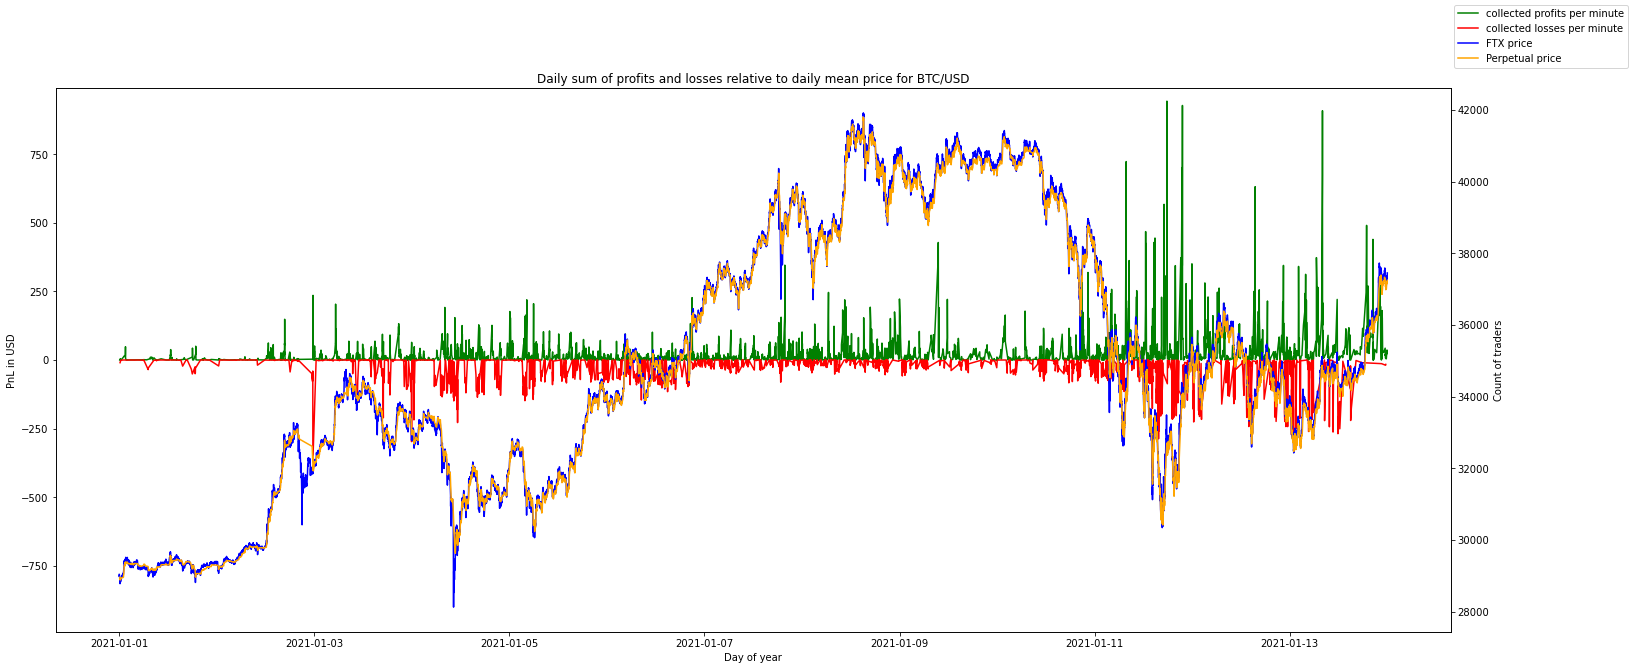

In [16]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                               (changes_opens_closes_2021_df["time"] >= datetime(2021, 1, 1)) &
                                                               (changes_opens_closes_2021_df["time"] <= datetime(2021, 1, 14))], 
                                  btc_ftx_price_df[(btc_ftx_price_df["datetime"] >= datetime(2021, 1, 1)) &
                                                   (btc_ftx_price_df["datetime"] <= datetime(2021, 1, 14))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] >= datetime(2021, 1, 1)) &
                                                                (minutewise_high_low_price_btc["time"] <= datetime(2021, 1, 14))], 
                                  "BTC")

## Plot of 2021 with minutewise mean price distribution for BTC, ETH, PERP

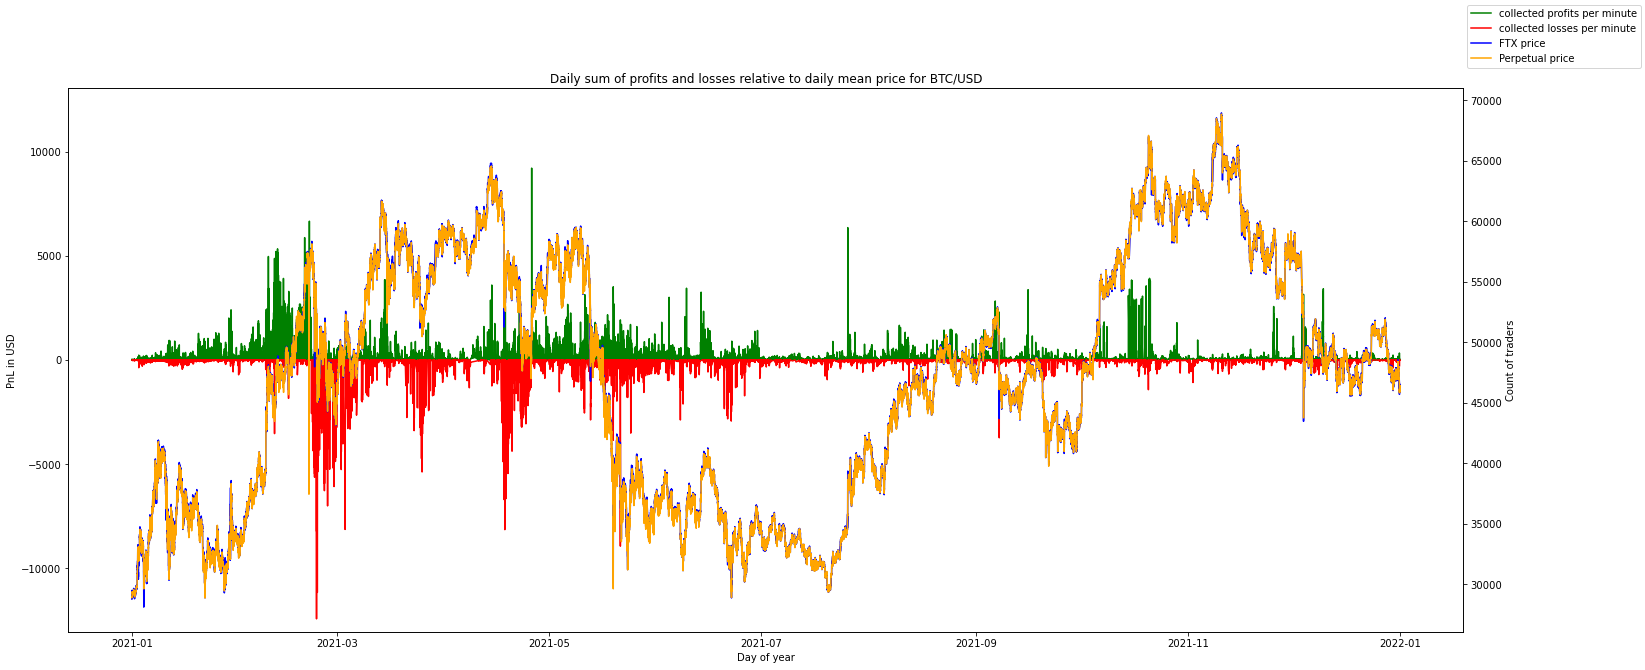

In [17]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  btc_ftx_price_df, minutewise_high_low_price_btc, "BTC")

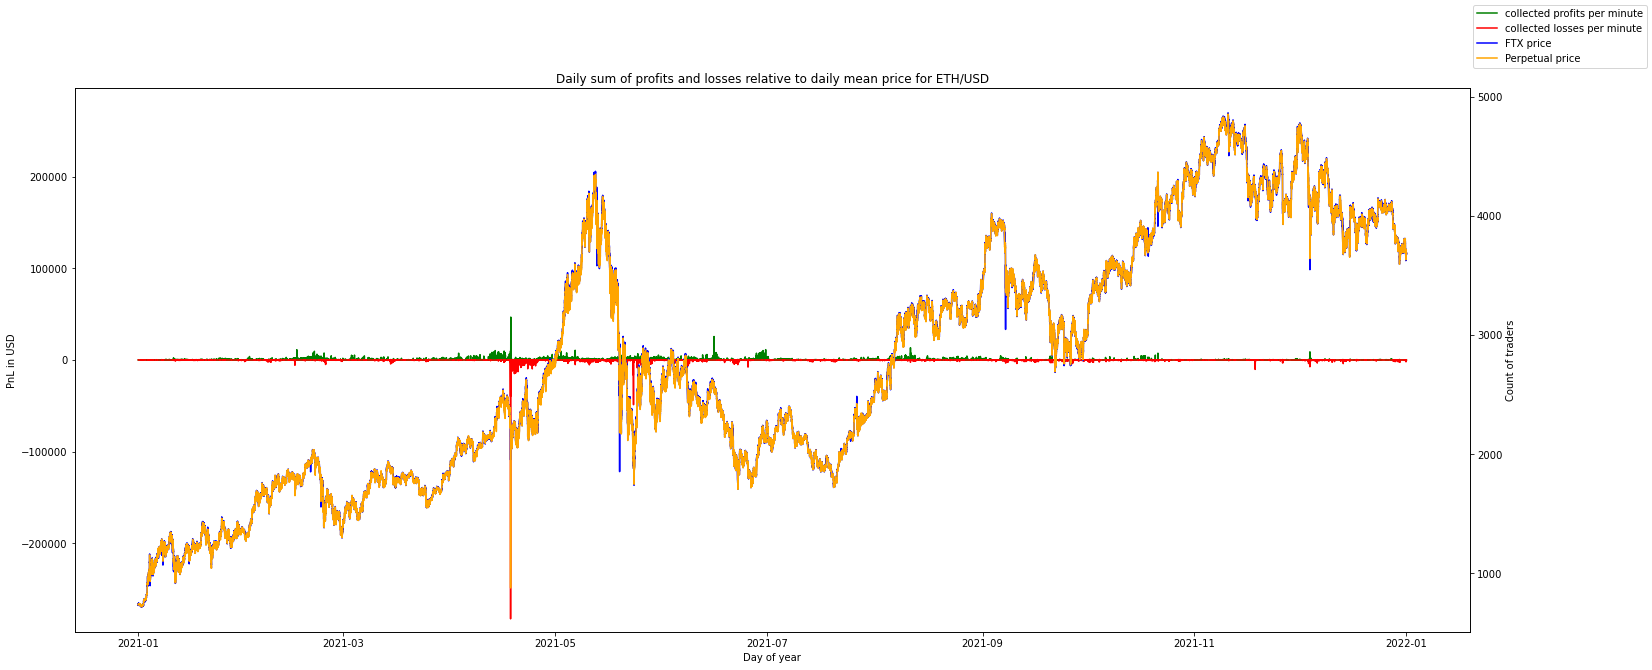

In [18]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  eth_ftx_price_df, minutewise_high_low_price_eth, "ETH")

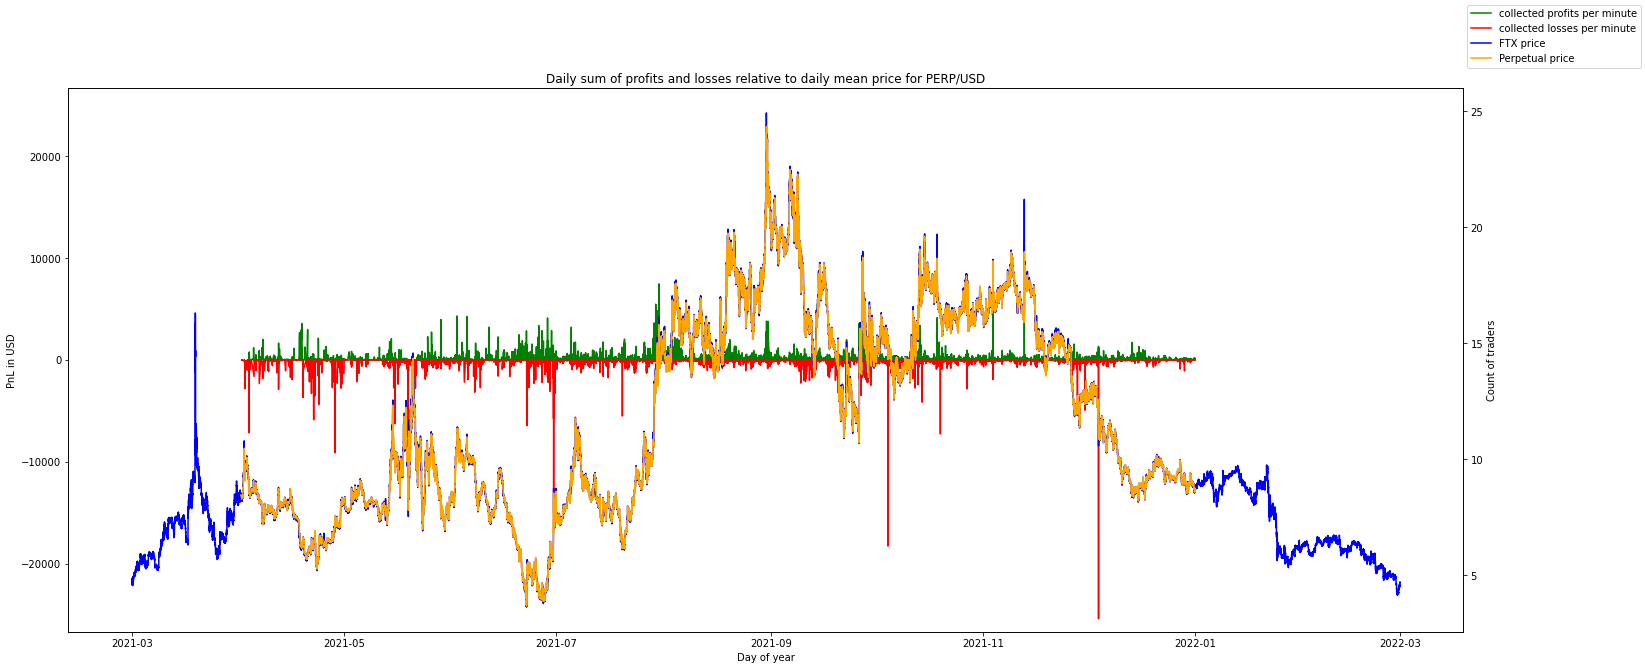

In [19]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  perp_ftx_price_df, minutewise_high_low_price_perp, "PERP")

# Check theory about price difference

Datasets have problem in getting the same indexes and it is not possible to extract indexes through the MultiIndex without problems, so there will be used a ```join``` operation that will all the magic under the plotting function, but it is required to set columns ```day_of_year, hour, minute``` as index

In [20]:
indexed_btc_ftx_price_df = btc_ftx_price_df
indexed_btc_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

indexed_eth_ftx_price_df = eth_ftx_price_df
indexed_eth_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

indexed_perp_ftx_price_df = perp_ftx_price_df
indexed_perp_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

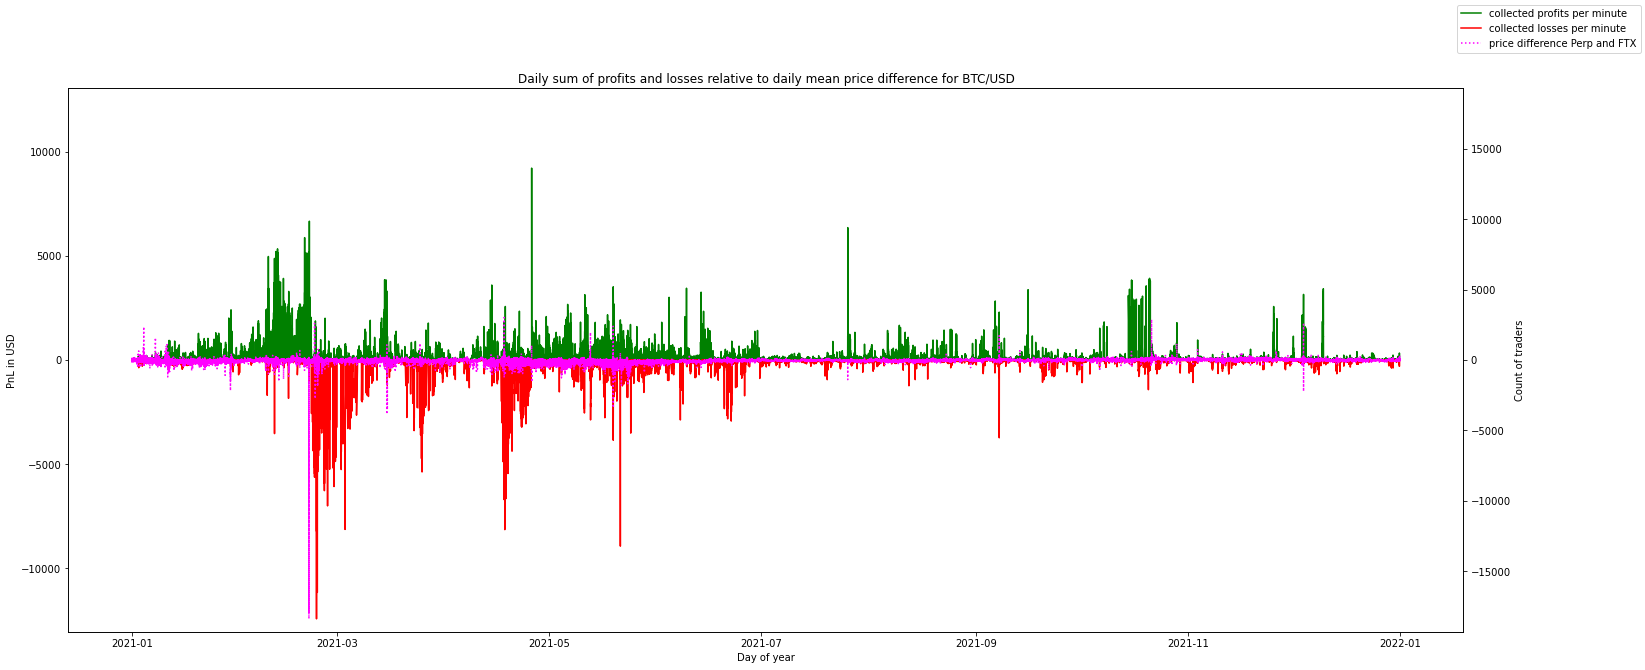

In [21]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  indexed_btc_ftx_price_df, minutewise_high_low_price_btc, "BTC", separate_plots=False)

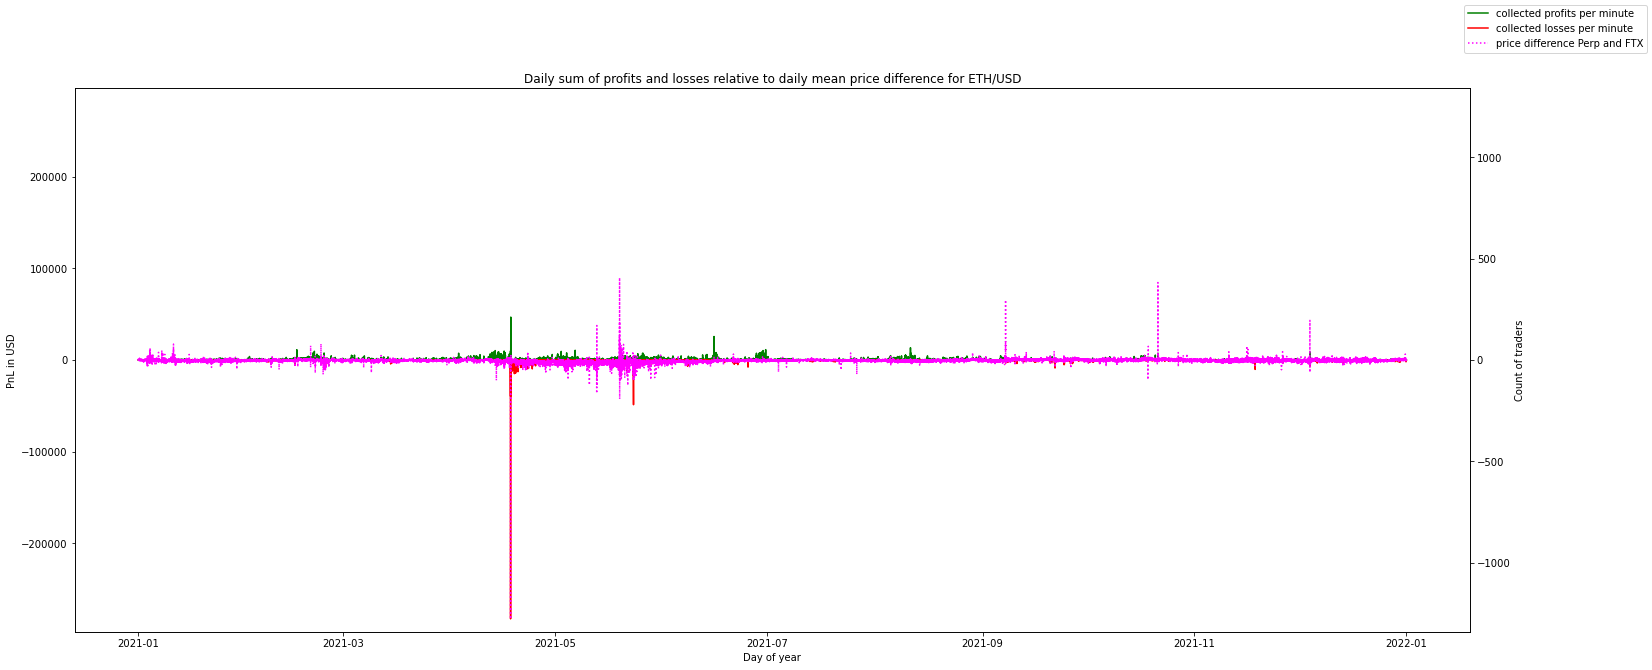

In [22]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  indexed_eth_ftx_price_df, minutewise_high_low_price_eth, "ETH", separate_plots=False)

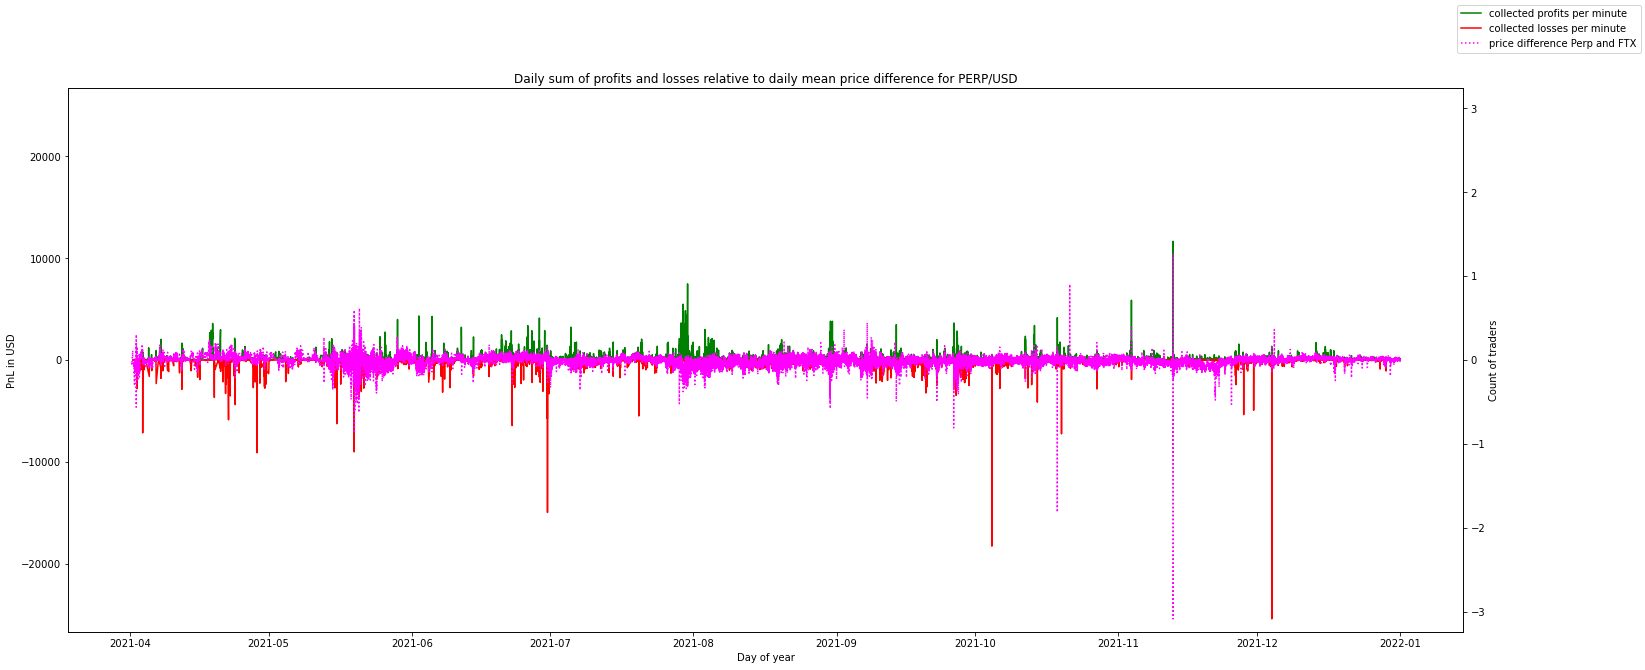

In [23]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  indexed_perp_ftx_price_df, minutewise_high_low_price_perp, "PERP", separate_plots=False)

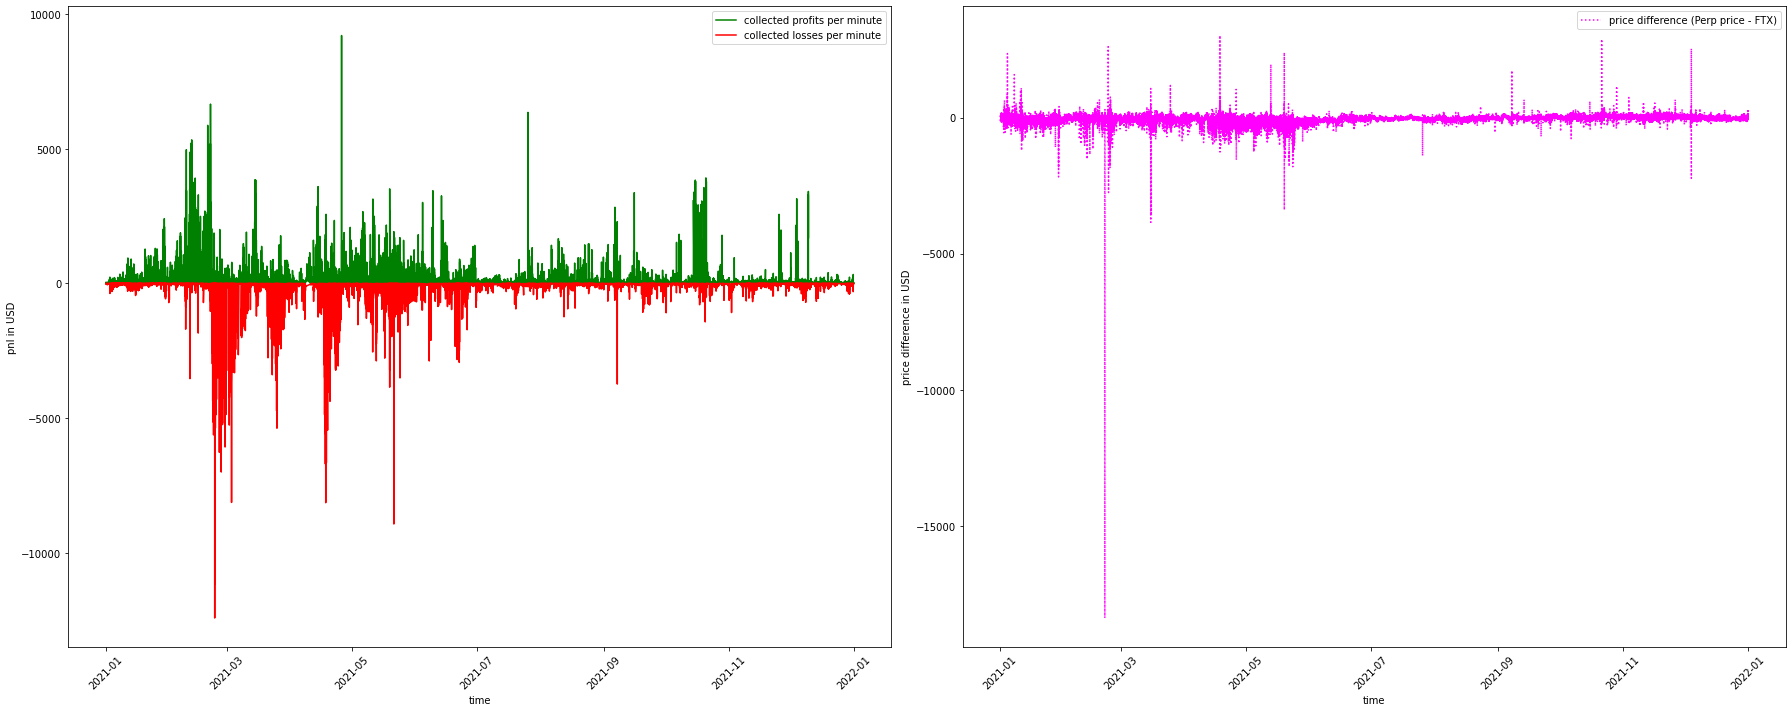

In [24]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  indexed_btc_ftx_price_df, minutewise_high_low_price_btc, "BTC", separate_plots=True)

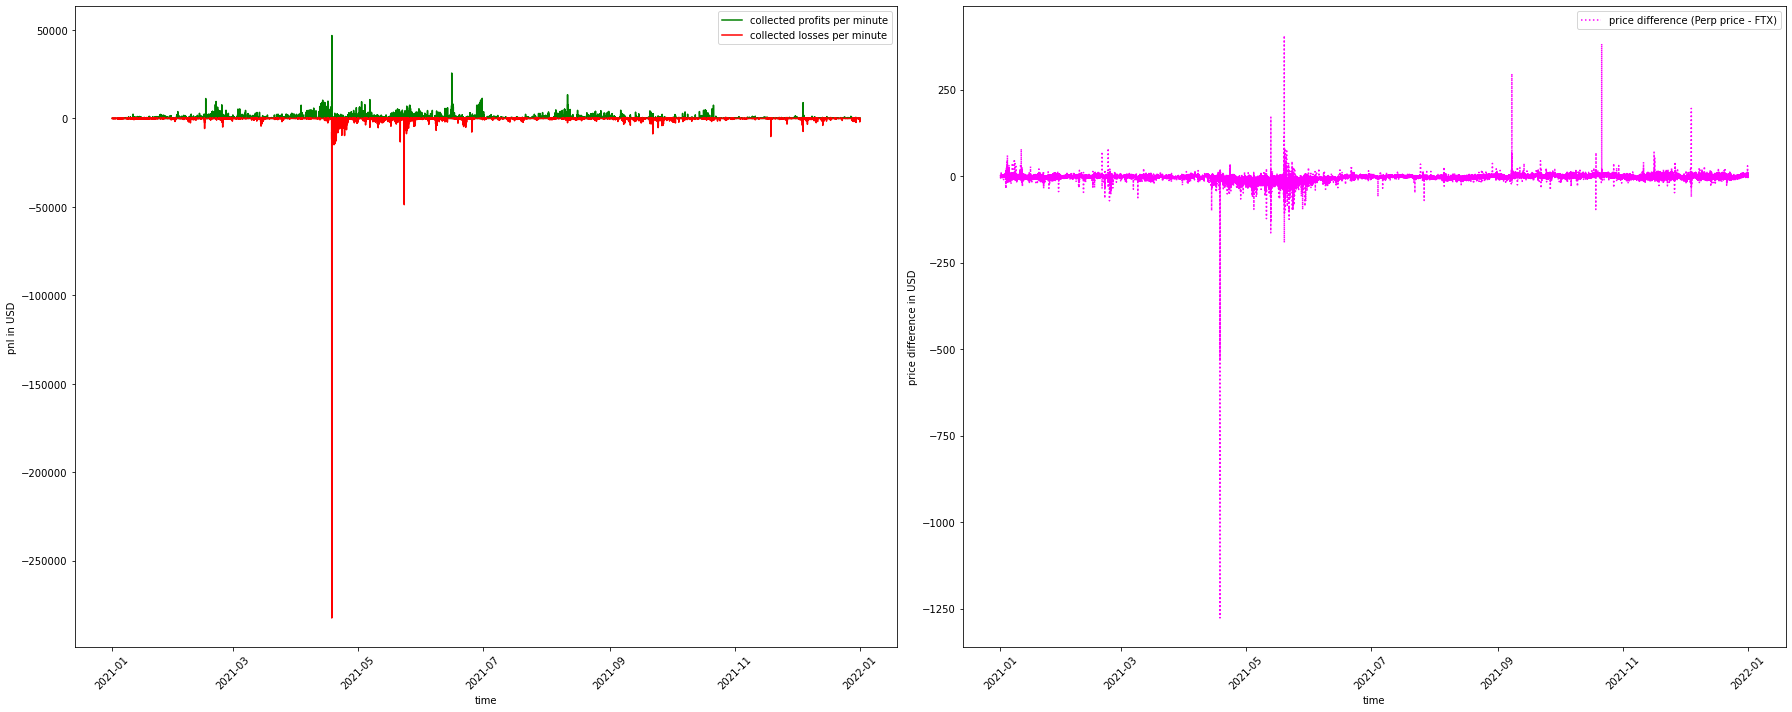

In [25]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  indexed_eth_ftx_price_df, minutewise_high_low_price_eth, "ETH", separate_plots=True)

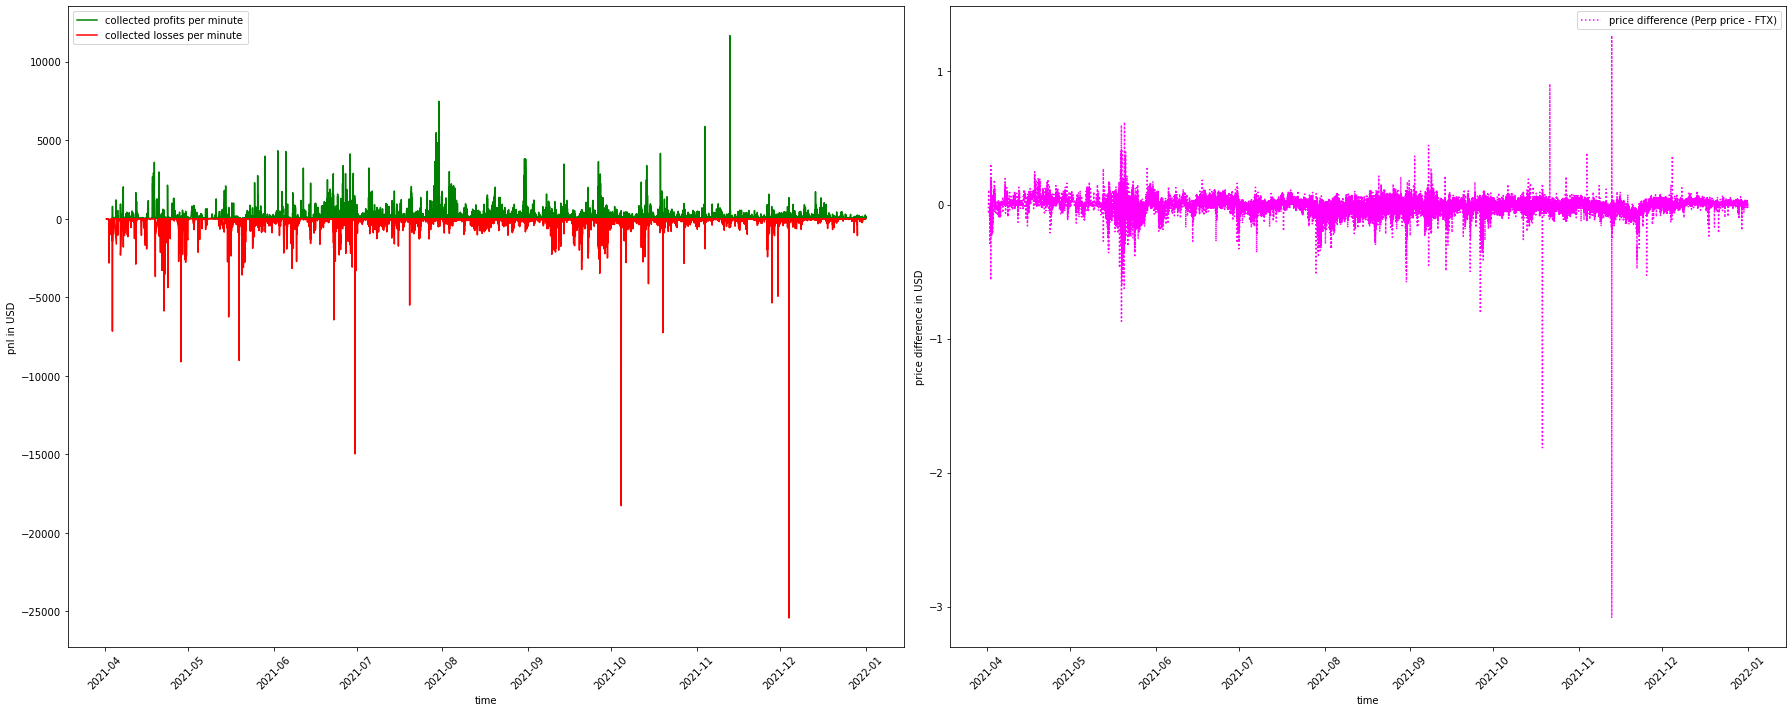

In [26]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  indexed_perp_ftx_price_df, minutewise_high_low_price_perp, "PERP", separate_plots=True)

# Extracting moments with biggest price changes

In [27]:
btc_price_diff_df = btc_ftx_price_df.join(minutewise_high_low_price_btc.rename(columns={"high": "perp_high", "low": "perp_low"}))
btc_price_diff_df.dropna(inplace=True)
btc_price_diff_df["perp_mean"] = (btc_price_diff_df["perp_high"] + btc_price_diff_df["perp_low"]) / 2
btc_price_diff_df["ftx_mean"] = (btc_price_diff_df["high"] + btc_price_diff_df["low"]) / 2
btc_price_diff_df["mean_diff"] = btc_price_diff_df["perp_mean"] - btc_price_diff_df["ftx_mean"]
btc_price_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
1           0    9       28947.0  28963.5  28888.5  28906.5  9.353515e+05   
                 11      28902.5  28919.0  28827.0  28864.5  8.463872e+04   
                 12      28864.5  28896.5  28864.5  28888.5  2.455438e+04   
                 13      28888.5  28888.5  28779.5  28781.0  5.708684e+05   
                 14      28781.0  28820.5  28737.5  28812.5  5.385798e+05   
...                          ...      ...      ...      ...           ...   
365         23   33      46395.0  46510.0  46373.0  46470.0  7.510078e+05   
                 53      46352.0  46352.0  46304.0  46311.0  2.451981e+05   
                 54      46311.0  46311.0  46261.0  46280.0  1.941372e+05   
                 55      46280.0  46280.0  46242.0  46244.0  1.835072e+05   
                 58      46237.0  46237.0  46136.0  46179.0  1.191280e+06   

                                   datetime     perp_high      perp_low  \
day_of_year hour minute                                                   
1           0    9      2021-01-01 00:09:00  28959.727627  28957.442469   
                 11     2021-01-01 00:11:00  28953.872892  28945.736026   
                 12     2021-01-01 00:12:00  28942.311123  28940.456032   
                 13     2021-01-01 00:13:00  28937.031935  28925.480922   
                 14     2021-01-01 00:14:00  28923.057646  28884.477598   
...                                     ...           ...           ...   
365         23   33     2021-12-31 23:33:00  46404.354442  46404.354442   
                 53     2021-12-31 23:53:00  46388.749782  46388.749782   
                 54     2021-12-31 23:54:00  46351.456419  46351.441422   
                 55     2021-12-31 23:55:00  46289.160186  46289.160186   
                 58     2021-12-31 23:58:00  46264.306633  46212.412414   

                            timestamp                time     perp_mean  \
day_of_year hour minute                                                   
1           0    9       1.609460e+09 2021-01-01 00:09:50  28958.585048   
                 11      1.609460e+09 2021-01-01 00:11:30  28949.804459   
                 12      1.609460e+09 2021-01-01 00:12:00  28941.383578   
                 13      1.609460e+09 2021-01-01 00:13:10  28931.256428   
                 14      1.609460e+09 2021-01-01 00:14:00  28903.767622   
...                               ...                 ...           ...   
365         23   33      1.640994e+09 2021-12-31 23:33:50  46404.354442   
                 53      1.640995e+09 2021-12-31 23:53:20  46388.749782   
                 54      1.640995e+09 2021-12-31 23:54:35  46351.448921   
                 55      1.640995e+09 2021-12-31 23:55:45  46289.160186   
                 58      1.640995e+09 2021-12-31 23:58:15  46238.359523   

                         ftx_mean   mean_diff  
day_of_year hour minute                        
1           0    9        28926.0   32.585048  
                 11       28873.0   76.804459  
                 12       28880.5   60.883578  
                 13       28834.0   97.256428  
                 14       28779.0  124.767622  
...                           ...         ...  
365         23   33       46441.5  -37.145558  
                 53       46328.0   60.749782  
                 54       46286.0   65.448921  
                 55       46261.0   28.160186  
                 58       46186.5   51.859523  

[180195 rows x 13 columns]

In [28]:
btc_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = btc_price_diff_df.tail(20)
biggest_negative_diff_df = btc_price_diff_df.head(100)

In [29]:
biggest_positive_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
4           10   21      28976.0  28997.5  28452.5  28527.5  8.599543e+05   
7           18   49      36718.0  36718.0  36718.0  36718.0  0.000000e+00   
                 48      37042.0  37293.0  36260.0  36718.0  6.268704e+05   
108         3    20      57586.0  57622.0  55243.0  56232.0  4.980199e+06   
4           10   22      28527.5  28722.5  28345.0  28618.0  4.759765e+05   
                 18      28300.5  29177.5  28223.0  28771.0  1.390056e+06   
250         15   11      44256.0  45000.0  44044.0  44914.0  2.608327e+06   
133         0    2       47412.0  47895.0  46611.0  46812.0  3.544551e+06   
108         3    22      54421.0  56015.0  54223.0  55408.0  3.290946e+06   
133         0    3       46807.0  47725.0  45853.0  46624.0  4.175564e+06   
53          14   16      49929.0  50007.0  47500.0  47872.0  1.277886e+07   
4           10   16      29055.0  29102.5  27700.5  27971.5  1.646875e+06   
53          14   18      47999.0  47999.0  47999.0  47999.0  0.000000e+00   
4           10   17      28064.0  28471.0  27780.0  28300.5  1.257647e+06   
139         12   55      32112.0  32209.0  32022.0  32143.0  3.785414e+06   
338         5    27      44671.0  45146.0  41800.0  42424.0  1.458786e+07   
53          14   17      47875.0  48247.0  47700.0  47999.0  3.274677e+05   
294         11   34      65737.0  65782.0  58555.0  64209.0  2.442690e+07   
108         3    36      51815.0  52709.0  49987.0  51904.0  3.568646e+06   
                 35      52308.0  52638.0  49880.0  51815.0  6.731925e+06   

                                   datetime     perp_high      perp_low  \
day_of_year hour minute                                                   
4           10   21     2021-01-04 10:21:00  30273.237902  30233.005476   
7           18   49     2021-01-07 18:49:00  38275.785097  38275.785097   
                 48     2021-01-07 18:48:00  38390.921012  38330.702617   
108         3    20     2021-04-18 03:20:00  58135.942428  58079.926777   
4           10   22     2021-01-04 10:22:00  30228.283460  30196.575198   
                 18     2021-01-04 10:18:00  30440.566209  30350.407025   
250         15   11     2021-09-07 15:11:00  46255.732924  46255.732924   
133         0    2      2021-05-13 00:02:00  49100.649668  48996.939022   
108         3    22     2021-04-18 03:22:00  56929.778775  56929.778775   
133         0    3      2021-05-13 00:03:00  48896.515392  48600.706311   
53          14   16     2021-02-22 14:16:00  50833.278363  50601.700259   
4           10   16     2021-01-04 10:16:00  30596.962151  30516.912331   
53          14   18     2021-02-22 14:18:00  50564.446826  50107.167163   
4           10   17     2021-01-04 10:17:00  30511.814373  30455.824276   
139         12   55     2021-05-19 12:55:00  34510.901377  34510.901377   
338         5    27     2021-12-04 05:27:00  46011.508131  46011.508131   
53          14   17     2021-02-22 14:17:00  50588.839887  50576.971730   
294         11   34     2021-10-21 11:34:00  65868.116206  64236.368969   
108         3    36     2021-04-18 03:36:00  54331.103633  54204.076519   
                 35     2021-04-18 03:35:00  54394.700906  54164.425313   

                            timestamp                time     perp_mean  \
day_of_year hour minute                                                   
4           10   21      1.609756e+09 2021-01-04 10:21:10  30253.121689   
7           18   49      1.610045e+09 2021-01-07 18:49:30  38275.785097   
                 48      1.610045e+09 2021-01-07 18:48:00  38360.811814   
108         3    20      1.618716e+09 2021-04-18 03:20:00  58107.934603   
4           10   22      1.609756e+09 2021-01-04 10:22:10  30212.429329   
                 18      1.609755e+09 2021-01-04 10:18:00  30395.486617   
250         15   11      1.631028e+09 2021-09-07 15:11:40  46255.732924   
133    

In [30]:
biggest_negative_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
51          23   13      55820.0  55909.0  55780.0  55900.0  2.103337e+05   
                 14      55900.0  55917.0  55841.0  55899.0  2.137261e+05   
                 15      55899.0  55902.0  55752.0  55752.0  1.118241e+05   
                 16      55752.0  55788.0  55652.0  55745.0  4.029467e+04   
                 17      55745.0  55765.0  55670.0  55739.0  2.000566e+05   
...                          ...      ...      ...      ...           ...   
53          18   16      52080.0  52257.0  52080.0  52200.0  2.722819e+05   
139         13   33      34450.0  34927.0  34143.0  34624.0  1.871218e+06   
52          0    22      55790.0  55839.0  55756.0  55839.0  8.445572e+04   
74          9    42      55174.0  55500.0  55172.0  55444.0  3.015764e+06   
139         13   16      31728.0  32500.0  31700.0  32167.0  5.415231e+06   

                                   datetime     perp_high      perp_low  \
day_of_year hour minute                                                   
51          23   13     2021-02-20 23:13:00  37520.097729  37383.395763   
                 14     2021-02-20 23:14:00  37544.946961  37527.047080   
                 15     2021-02-20 23:15:00  37551.904227  37519.319497   
                 16     2021-02-20 23:16:00  37558.708552  37538.534976   
                 17     2021-02-20 23:17:00  37565.880522  37535.863761   
...                                     ...           ...           ...   
53          18   16     2021-02-22 18:16:00  50079.983356  49301.291631   
139         13   33     2021-05-19 13:33:00  32077.490049  32077.490049   
52          0    22     2021-02-21 00:22:00  53490.597996  53245.379647   
74          9    42     2021-03-15 09:42:00  53734.171341  52121.313298   
139         13   16     2021-05-19 13:16:00  29754.791799  29754.791799   

                            timestamp                time     perp_mean  \
day_of_year hour minute                                                   
51          23   13      1.613863e+09 2021-02-20 23:13:05  37451.746746   
                 14      1.613863e+09 2021-02-20 23:14:05  37535.997020   
                 15      1.613863e+09 2021-02-20 23:15:00  37535.611862   
                 16      1.613863e+09 2021-02-20 23:16:10  37548.621764   
                 17      1.613863e+09 2021-02-20 23:17:35  37550.872141   
...                               ...                 ...           ...   
53          18   16      1.614018e+09 2021-02-22 18:16:00  49690.637493   
139         13   33      1.621431e+09 2021-05-19 13:33:30  32077.490049   
52          0    22      1.613867e+09 2021-02-21 00:22:00  53367.988821   
74          9    42      1.615801e+09 2021-03-15 09:42:20  52927.742319   
139         13   16      1.621430e+09 2021-05-19 13:16:30  29754.791799   

                         ftx_mean     mean_diff  
day_of_year hour minute                          
51          23   13       55844.5 -18392.753254  
                 14       55879.0 -18343.002980  
                 15       55827.0 -18291.388138  
                 16       55720.0 -18171.378236  
                 17       55717.5 -18166.627859  
...                           ...           ...  
53          18   16       52168.5  -2477.862507  
139         13   33       34535.0  -2457.509951  
52          0    22       55797.5  -2429.511179  
74          9    42       55336.0  -2408.257681  
139         13   16       32100.0  -2345.208201  

[100 rows x 13 columns]

Days with biggest differences in the BTC prices:
*   **108 - biggest positive difference (April 18);**
*   **51 - biggets negative difference (20 February);**
*   294 - positive (21 October);
*   53 - positive (22 February);
*   338 - positive (4 December);
*   139 - positive (19 May);
*   4 - positive (January 4);
*   133 - positive (13 May);
*   250 - positive (7 September);
*   74 - negative (15 March);
*   52 - negative (21 February);

In [31]:
eth_price_diff_df = eth_ftx_price_df.join(minutewise_high_low_price_eth.rename(columns={"high": "perp_high", "low": "perp_low"}))
eth_price_diff_df.dropna(inplace=True)
eth_price_diff_df["perp_mean"] = (eth_price_diff_df["perp_high"] + eth_price_diff_df["perp_low"]) / 2
eth_price_diff_df["ftx_mean"] = (eth_price_diff_df["high"] + eth_price_diff_df["low"]) / 2
eth_price_diff_df["mean_diff"] = eth_price_diff_df["perp_mean"] - eth_price_diff_df["ftx_mean"]
eth_price_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
1           0    1        737.80   739.92   737.80   739.53   30086.73403   
                 8        736.00   736.00   734.63   735.17  131081.19620   
                 9        735.17   735.76   733.79   733.93    9391.59751   
                 10       733.93   734.92   733.71   733.71   93304.41975   
                 11       733.71   734.12   731.56   733.04    7461.30084   
...                          ...      ...      ...      ...           ...   
365         23   48      3690.10  3690.40  3686.80  3686.80   27180.35720   
                 50      3687.00  3687.00  3683.80  3684.20   57810.83160   
                 53      3685.20  3685.30  3680.30  3680.80  125901.02420   
                 58      3677.70  3678.60  3672.60  3675.50  293073.79940   
                 59      3675.50  3678.60  3675.20  3676.50  138598.98440   

                                   datetime    perp_high     perp_low  \
day_of_year hour minute                                                 
1           0    1      2021-01-01 00:01:00   737.882327   737.709061   
                 8      2021-01-01 00:08:00   737.794798   737.337011   
                 9      2021-01-01 00:09:00   737.247842   737.055969   
                 10     2021-01-01 00:10:00   736.969164   736.738792   
                 11     2021-01-01 00:11:00   736.692233   736.375695   
...                                     ...          ...          ...   
365         23   48     2021-12-31 23:48:00  3695.051917  3695.051917   
                 50     2021-12-31 23:50:00  3691.906331  3691.906331   
                 53     2021-12-31 23:53:00  3692.277390  3684.711282   
                 58     2021-12-31 23:58:00  3681.570278  3679.683100   
                 59     2021-12-31 23:59:00  3682.084257  3682.084257   

                            timestamp                time    perp_mean  \
day_of_year hour minute                                                  
1           0    1       1.609459e+09 2021-01-01 00:01:10   737.795694   
                 8       1.609460e+09 2021-01-01 00:08:05   737.565905   
                 9       1.609460e+09 2021-01-01 00:09:25   737.151906   
                 10      1.609460e+09 2021-01-01 00:10:00   736.853978   
                 11      1.609460e+09 2021-01-01 00:11:10   736.533964   
...                               ...                 ...          ...   
365         23   48      1.640995e+09 2021-12-31 23:48:25  3695.051917   
                 50      1.640995e+09 2021-12-31 23:50:05  3691.906331   
                 53      1.640995e+09 2021-12-31 23:53:15  3688.494336   
                 58      1.640995e+09 2021-12-31 23:58:15  3680.626689   
                 59      1.640995e+09 2021-12-31 23:59:45  3682.084257   

                         ftx_mean  mean_diff  
day_of_year hour minute                       
1           0    1        738.860  -1.064306  
                 8        735.315   2.250905  
                 9        734.775   2.376906  
                 10       734.315   2.538978  
                 11       732.840   3.693964  
...                           ...        ...  
365         23   48      3688.600   6.451917  
                 50      3685.400   6.506331  
                 53      3682.800   5.694336  
                 58      3675.600   5.026689  
                 59      3676.900   5.184257  

[248550 rows x 13 columns]

In [32]:
eth_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = eth_price_diff_df.tail(20)
biggest_negative_diff_df = eth_price_diff_df.head(20)

In [33]:
biggest_positive_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
139         13   1       2195.9  2345.9  2187.7  2217.4  2.234135e+06   
            11   31      2599.9  2599.9  2501.0  2504.4  3.904193e+06   
            12   49      2405.8  2408.8  2311.0  2321.0  1.751499e+06   
133         0    2       3702.1  3710.3  3610.0  3631.0  3.332093e+06   
338         5    28      3506.7  3657.3  3480.0  3614.6  6.027607e+06   
133         0    4       3604.8  3651.5  3530.5  3635.7  7.167573e+06   
139         12   52      2204.3  2456.3  2155.0  2176.9  1.894841e+06   
            13   6       2117.9  2179.2  2105.1  2142.8  5.557557e+06   
133         0    3       3631.0  3633.3  3530.5  3604.1  3.961676e+06   
139         12   51      2249.9  2366.9  2200.0  2204.3  2.897541e+06   
250         15   7       3440.5  3441.1  3145.5  3254.8  5.539080e+06   
338         5    27      3591.8  3610.0  3487.3  3506.7  9.986057e+06   
250         15   11      3170.0  3274.5  3156.4  3246.4  2.579805e+06   
139         12   58      2191.5  2359.5  2004.1  2272.4  5.897074e+06   
                 57      2043.6  2229.7  2030.0  2227.1  2.424699e+06   
250         15   8       3254.8  3312.8  3040.0  3097.0  6.347705e+06   
                 10      3039.1  3227.4  3026.3  3167.4  6.104679e+06   
139         12   53      2176.9  2212.2  2011.0  2014.2  2.375391e+06   
294         11   34      4344.0  4350.0  3477.0  4229.1  1.548388e+07   
139         12   54      2014.2  2054.8  1975.2  1990.0  5.035937e+06   

                                   datetime    perp_high     perp_low  \
day_of_year hour minute                                                 
139         13   1      2021-05-19 13:01:00  2365.577555  2365.577555   
            11   31     2021-05-19 11:31:00  2666.425803  2659.933104   
            12   49     2021-05-19 12:49:00  2475.987973  2472.510221   
133         0    2      2021-05-13 00:02:00  3777.126236  3777.126236   
338         5    28     2021-12-04 05:28:00  3697.229333  3697.229333   
133         0    4      2021-05-13 00:04:00  3728.483828  3728.483828   
139         12   52     2021-05-19 12:52:00  2446.606206  2441.585707   
            13   6      2021-05-19 13:06:00  2311.910517  2311.910517   
133         0    3      2021-05-13 00:03:00  3772.079634  3732.353087   
139         12   51     2021-05-19 12:51:00  2471.525051  2471.525051   
250         15   7      2021-09-07 15:07:00  3487.579505  3485.646041   
338         5    27     2021-12-04 05:27:00  3744.185189  3744.185189   
250         15   11     2021-09-07 15:11:00  3416.827380  3416.827380   
139         12   58     2021-05-19 12:58:00  2389.620283  2389.620283   
                 57     2021-05-19 12:57:00  2401.579317  2401.579317   
250         15   8      2021-09-07 15:08:00  3464.167853  3464.167853   
                 10     2021-09-07 15:10:00  3422.860922  3422.860922   
139         12   53     2021-05-19 12:53:00  2437.974975  2437.974975   
294         11   34     2021-10-21 11:34:00  4346.202884  4245.436100   
139         12   54     2021-05-19 12:54:00  2421.121421  2421.121421   

                            timestamp                time    perp_mean  \
day_of_year hour minute                                                  
139         13   1       1.621429e+09 2021-05-19 13:01:20  2365.577555   
            11   31      1.621424e+09 2021-05-19 11:31:10  2663.179453   
            12   49      1.621429e+09 2021-05-19 12:49:15  2474.249097   
133         0    2       1.620864e+09 2021-05-13 00:02:35  3777.126236   
338         5    28      1.638596e+09 2021-12-04 05:28:07  3697.229333   
133         0    4       1.620864e+09 2021-05-13 00:04:20  3728.483828   
139         12   52      1.621429e+09 2021-05-19 12:52:00  2444.095957   
            13   6       1.621430e+09 2021-05-19 13:06:10  2311.910517   
133         0    3       1.620864e+09 2021-05-13 00:03:05  3752.216360   

In [34]:
biggest_negative_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
108         4    6       2149.8  2170.3  2148.2  2168.3  1.851841e+06   
                 9       2158.6  2177.8  2154.6  2170.4  3.740247e+06   
                 7       2168.3  2172.2  2147.8  2154.4  1.373304e+06   
                 4       2147.8  2154.9  2143.9  2145.2  2.848670e+06   
                 5       2145.3  2154.2  2143.2  2149.7  3.276876e+06   
                 10      2170.8  2178.6  2156.3  2163.5  1.904530e+06   
                 11      2163.5  2164.4  2150.3  2156.2  1.564093e+06   
            3    58      2159.7  2182.2  2150.4  2176.8  1.373046e+06   
            4    0       2175.4  2176.7  2151.1  2171.5  1.011782e+06   
                 12      2156.1  2162.8  2150.1  2161.6  2.659065e+06   
                 1       2169.8  2177.6  2137.5  2150.7  1.396631e+06   
                 13      2161.5  2169.9  2157.4  2162.1  1.854689e+06   
                 3       2150.8  2161.0  2146.4  2149.6  4.789693e+06   
                 14      2162.2  2168.1  2160.7  2164.1  2.088587e+06   
                 2       2151.9  2156.6  2129.7  2150.8  3.794714e+06   
                 15      2164.2  2169.2  2161.6  2166.3  1.520026e+06   
                 16      2166.3  2169.0  2161.0  2165.0  8.306355e+05   
            3    57      2143.4  2161.7  2142.6  2158.2  2.536597e+06   
            4    17      2165.2  2166.4  2158.5  2161.2  7.237073e+05   
                 18      2161.2  2167.9  2158.7  2165.6  9.113330e+05   

                                   datetime    perp_high     perp_low  \
day_of_year hour minute                                                 
108         4    6      2021-04-18 04:06:00   881.932210   881.932210   
                 9      2021-04-18 04:09:00   890.290017   890.290017   
                 7      2021-04-18 04:07:00   888.516484   882.126902   
                 4      2021-04-18 04:04:00   878.169145   878.169145   
                 5      2021-04-18 04:05:00   881.119567   881.119567   
                 10     2021-04-18 04:10:00   910.483669   891.131071   
                 11     2021-04-18 04:11:00   921.493633   910.167622   
            3    58     2021-04-18 03:58:00   929.531716   929.531716   
            4    0      2021-04-18 04:00:00   931.373400   929.909763   
                 12     2021-04-18 04:12:00   925.150747   925.150747   
                 1      2021-04-18 04:01:00   931.688942   931.688942   
                 13     2021-04-18 04:13:00   944.589881   936.106149   
                 3      2021-04-18 04:03:00   939.094378   939.094378   
                 14     2021-04-18 04:14:00   957.834638   945.494779   
                 2      2021-04-18 04:02:00   938.777585   931.373400   
                 15     2021-04-18 04:15:00   973.704906   960.252053   
                 16     2021-04-18 04:16:00   983.028167   979.720077   
            3    57     2021-04-18 03:57:00  1032.512205   952.936152   
            4    17     2021-04-18 04:17:00  1027.242282   991.038585   
                 18     2021-04-18 04:18:00  1043.211640  1034.586483   

                            timestamp                time    perp_mean  \
day_of_year hour minute                                                  
108         4    6       1.618719e+09 2021-04-18 04:06:00   881.932210   
                 9       1.618719e+09 2021-04-18 04:09:05   890.290017   
                 7       1.618719e+09 2021-04-18 04:07:30   885.321693   
                 4       1.618719e+09 2021-04-18 04:04:55   878.169145   
                 5       1.618719e+09 2021-04-18 04:05:20   881.119567   
                 10      1.618719e+09 2021-04-18 04:10:00   900.807370   
                 11      1.618719e+09 2021-04-18 04:11:00   915.830627   
            3    58      1.618718e+09 2021-04-18 03:58:55   929.531716   
            4    0       1.618718e+09 2021-04-18 04:00:00   930.641581   

Days with biggest difference in ETH price:

*   **139 - biggest positive (May 19);**
*   **108 - biggest negative (April 18);**
*   250 - positive (September 7);
*   294 - positive (October 21);

In [35]:
perp_price_diff_df = perp_ftx_price_df.join(minutewise_high_low_price_perp.rename(columns={"high": "perp_high", "low": "perp_low"}))
perp_price_diff_df.dropna(inplace=True)
perp_price_diff_df["perp_mean"] = (perp_price_diff_df["perp_high"] + perp_price_diff_df["perp_low"]) / 2
perp_price_diff_df["ftx_mean"] = (perp_price_diff_df["high"] + perp_price_diff_df["low"]) / 2
perp_price_diff_df["mean_diff"] = perp_price_diff_df["perp_mean"] - perp_price_diff_df["ftx_mean"]
perp_price_diff_df

open   high    low  close     volume  \
day_of_year hour minute                                          
91          9    41      8.500  8.500  8.500  8.500     0.0000   
                 42      8.500  8.500  8.500  8.500     0.0000   
                 43      8.500  8.500  8.499  8.499     0.8499   
                 44      8.499  8.499  8.498  8.498     0.8498   
                 45      8.498  8.500  8.498  8.500     0.0000   
...                        ...    ...    ...    ...        ...   
365         23   52      8.770  8.779  8.770  8.779    14.9158   
                 55      8.779  8.779  8.735  8.735    96.0850   
                 57      8.735  8.735  8.735  8.735     0.0000   
                 58      8.735  8.735  8.729  8.729    14.8410   
                 59      8.729  8.773  8.701  8.773  3009.4790   

                                   datetime  perp_high  perp_low  \
day_of_year hour minute                                            
91          9    41     2021-04-01 09:41:00   8.447242  8.447242   
                 42     2021-04-01 09:42:00   8.448376  8.448376   
                 43     2021-04-01 09:43:00   8.449545  8.449545   
                 44     2021-04-01 09:44:00   8.450623  8.450623   
                 45     2021-04-01 09:45:00   8.453118  8.453118   
...                                     ...        ...       ...   
365         23   52     2021-12-31 23:52:00   8.768260  8.768260   
                 55     2021-12-31 23:55:00   8.766963  8.745656   
                 57     2021-12-31 23:57:00   8.738147  8.738147   
                 58     2021-12-31 23:58:00   8.730660  8.730660   
                 59     2021-12-31 23:59:00   8.717547  8.713836   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
91          9    41      1.617270e+09 2021-04-01 09:41:00   8.447242   
                 42      1.617270e+09 2021-04-01 09:42:05   8.448376   
                 43      1.617270e+09 2021-04-01 09:43:05   8.449545   
                 44      1.617270e+09 2021-04-01 09:44:05   8.450623   
                 45      1.617270e+09 2021-04-01 09:45:05   8.453118   
...                               ...                 ...        ...   
365         23   52      1.640995e+09 2021-12-31 23:52:30   8.768260   
                 55      1.640995e+09 2021-12-31 23:55:15   8.756309   
                 57      1.640995e+09 2021-12-31 23:57:40   8.738147   
                 58      1.640995e+09 2021-12-31 23:58:25   8.730660   
                 59      1.640995e+09 2021-12-31 23:59:10   8.715692   

                         ftx_mean  mean_diff  
day_of_year hour minute                       
91          9    41        8.5000  -0.052758  
                 42        8.5000  -0.051624  
                 43        8.4995  -0.049955  
                 44        8.4985  -0.047877  
                 45        8.4990  -0.045882  
...                           ...        ...  
365         23   52        8.7745  -0.006240  
                 55        8.7570  -0.000691  
                 57        8.7350   0.003147  
                 58        8.7320  -0.001340  
                 59        8.7370  -0.021308  

[121661 rows x 13 columns]

In [36]:
perp_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = perp_price_diff_df.tail(20)
biggest_negative_diff_df = perp_price_diff_df.head(20)

In [37]:
biggest_positive_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
141         2    4       12.851  12.851  12.827  12.827  0.000000e+00   
140         16   6       12.897  12.965  12.733  12.874  3.333825e+03   
139         11   24       8.836   8.836   8.800   8.800  2.971805e+04   
            13   40       7.540   7.540   7.540   7.540  0.000000e+00   
            11   25       8.800   8.806   8.764   8.800  8.635075e+03   
            14   49       8.355   8.355   8.139   8.166  0.000000e+00   
            13   21       7.665   7.722   7.665   7.722  4.093432e+03   
            12   59       8.103   8.139   8.042   8.138  1.045145e+04   
250         15   3       19.482  19.723  19.371  19.487  1.984062e+03   
139         12   55       8.289   8.377   8.194   8.194  2.690955e+04   
                 53       8.439   8.439   8.272   8.275  2.855035e+04   
140         16   7       12.733  12.905  12.501  12.635  1.079346e+04   
139         13   20       7.660   7.665   7.660   7.665  8.231742e+02   
            12   58       8.095   8.129   8.000   8.103  7.253311e+04   
                 57       8.103   8.116   8.052   8.095  1.469057e+04   
                 56       8.194   8.194   8.093   8.103  2.940051e+04   
140         16   8       12.635  12.635  12.501  12.501  0.000000e+00   
                 4       12.935  12.973  12.781  12.783  3.119907e+02   
294         11   34      16.710  16.714  14.600  16.160  3.555337e+05   
316         20   36      16.944  17.564  14.860  16.305  1.088019e+06   

                                   datetime  perp_high   perp_low  \
day_of_year hour minute                                             
141         2    4      2021-05-21 02:04:00  13.232102  13.232102   
140         16   6      2021-05-20 16:06:00  13.244096  13.244096   
139         11   24     2021-05-19 11:24:00   9.216958   9.216958   
            13   40     2021-05-19 13:40:00   7.939745   7.939745   
            11   25     2021-05-19 11:25:00   9.192220   9.184451   
            14   49     2021-05-19 14:49:00   8.664431   8.664431   
            13   21     2021-05-19 13:21:00   8.114719   8.114719   
            12   59     2021-05-19 12:59:00   8.516195   8.516195   
250         15   3      2021-09-07 15:03:00  20.021391  19.958631   
139         12   55     2021-05-19 12:55:00   8.795214   8.795214   
                 53     2021-05-19 12:53:00   8.911366   8.821237   
140         16   7      2021-05-20 16:07:00  13.220122  13.220122   
139         13   20     2021-05-19 13:20:00   8.202484   8.202484   
            12   58     2021-05-19 12:58:00   8.610937   8.610937   
                 57     2021-05-19 12:57:00   8.641941   8.623491   
                 56     2021-05-19 12:56:00   8.737596   8.737596   
140         16   8      2021-05-20 16:08:00  13.177026  13.177026   
                 4      2021-05-20 16:04:00  13.493927  13.493927   
294         11   34     2021-10-21 11:34:00  16.637737  16.481127   
316         20   36     2021-11-12 20:36:00  17.885860  17.063492   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
141         2    4       1.621563e+09 2021-05-21 02:04:45  13.232102   
140         16   6       1.621527e+09 2021-05-20 16:06:25  13.244096   
139         11   24      1.621423e+09 2021-05-19 11:24:15   9.216958   
            13   40      1.621432e+09 2021-05-19 13:40:35   7.939745   
            11   25      1.621424e+09 2021-05-19 11:25:30   9.188335   
            14   49      1.621436e+09 2021-05-19 14:49:00   8.664431   
            13   21      1.621430e+09 2021-05-19 13:21:10   8.114719   
            12   59      1.621429e+09 2021-05-19 12:59:20   8.516195   
250         15   3       1.631027e+09 2021-09-07 15:03:10  19.990011   
139         12   55      1.621429e+09 2021-05-19 12:55:15   8.795214   
                 53      1.621429e+09

In [38]:
biggest_negative_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
316         20   31      17.601  24.030  17.407  21.098  3.269795e+06   
                 32      21.098  23.147  19.261  19.645  8.895363e+04   
291         18   52      19.812  19.990  19.418  19.541  1.720302e+05   
                 51      16.849  19.954  16.835  19.823  1.515766e+06   
139         13   44       9.135   9.197   9.135   9.135  0.000000e+00   
269         8    35      11.923  13.412  11.912  13.107  2.002671e+05   
139         13   43       8.683   9.141   8.683   9.135  1.222231e+02   
316         20   33      19.642  20.233  19.099  19.642  1.469948e+05   
140         13   22      12.900  13.179  12.900  13.131  5.798645e+04   
269         8    36      12.956  12.956  12.373  12.457  6.422017e+04   
291         18   53      19.541  19.604  18.677  19.040  1.300553e+05   
139         16   48      10.892  10.939  10.892  10.928  2.647646e+03   
242         14   55      24.973  25.230  24.626  24.746  7.105336e+04   
139         16   47      10.830  10.940  10.654  10.892  1.923154e+03   
92          8    18      10.672  10.800  10.672  10.785  1.200412e+04   
                 17      10.583  10.682  10.565  10.672  2.229607e+04   
139         13   45       9.135   9.135   8.753   8.759  3.271351e+03   
                 42       8.505   8.683   8.505   8.683  6.327528e+03   
                 47       8.962   9.087   8.885   9.019  4.944932e+03   
329         11   56      15.029  15.039  15.000  15.000  2.158820e+03   

                                   datetime  perp_high   perp_low  \
day_of_year hour minute                                             
316         20   31     2021-11-12 20:31:00  18.275681  16.991880   
                 32     2021-11-12 20:32:00  18.573960  18.307593   
291         18   52     2021-10-18 18:52:00  18.283325  17.496869   
                 51     2021-10-18 18:51:00  17.481507  16.833807   
139         13   44     2021-05-19 13:44:00   8.296461   8.296461   
269         8    35     2021-09-26 08:35:00  12.009278  11.697617   
139         13   43     2021-05-19 13:43:00   8.188964   8.188964   
316         20   33     2021-11-12 20:33:00  19.023781  18.865991   
140         13   22     2021-05-20 13:22:00  12.414384  12.414384   
269         8    36     2021-09-26 08:36:00  12.082763  12.002298   
291         18   53     2021-10-18 18:53:00  18.745064  18.317429   
139         16   48     2021-05-19 16:48:00  10.378192  10.268563   
242         14   55     2021-08-30 14:55:00  24.473116  24.224320   
139         16   47     2021-05-19 16:47:00  10.234286  10.234286   
92          8    18     2021-04-02 08:18:00  10.225819  10.122386   
                 17     2021-04-02 08:17:00  10.075116  10.075116   
139         13   45     2021-05-19 13:45:00   8.404485   8.404485   
                 42     2021-05-19 13:42:00   8.055512   8.055512   
                 47     2021-05-19 13:47:00   8.454608   8.454608   
329         11   56     2021-11-25 11:56:00  14.539161  14.444309   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
316         20   31      1.636749e+09 2021-11-12 20:31:00  17.633780   
                 32      1.636749e+09 2021-11-12 20:32:00  18.440777   
291         18   52      1.634583e+09 2021-10-18 18:52:00  17.890097   
                 51      1.634583e+09 2021-10-18 18:51:15  17.157657   
139         13   44      1.621432e+09 2021-05-19 13:44:35   8.296461   
269         8    35      1.632645e+09 2021-09-26 08:35:05  11.853447   
139         13   43      1.621432e+09 2021-05-19 13:43:35   8.188964   
316         20   33      1.636749e+09 2021-11-12 20:33:30  18.944886   
140         13   22      1.621517e+09 2021-05-20 13:22:15  12.414384   
269         8    36      1.632645e+09 2021-09-26 08:36:00  12.042531   
291         18   53      1.634583e+09

Days with biggest price difference for PERP token:

*   **316 - biggest positive and negative (November 12);**
*   291 - negative (October 18);
*   139 - negative (May 19);
*   269 - negative (September 26);
*   133 - negative (May 13);
*   242 - negative (August 30);
*   140 - negative (May 20)

# Checking days with biggest differences

## BTC

### January

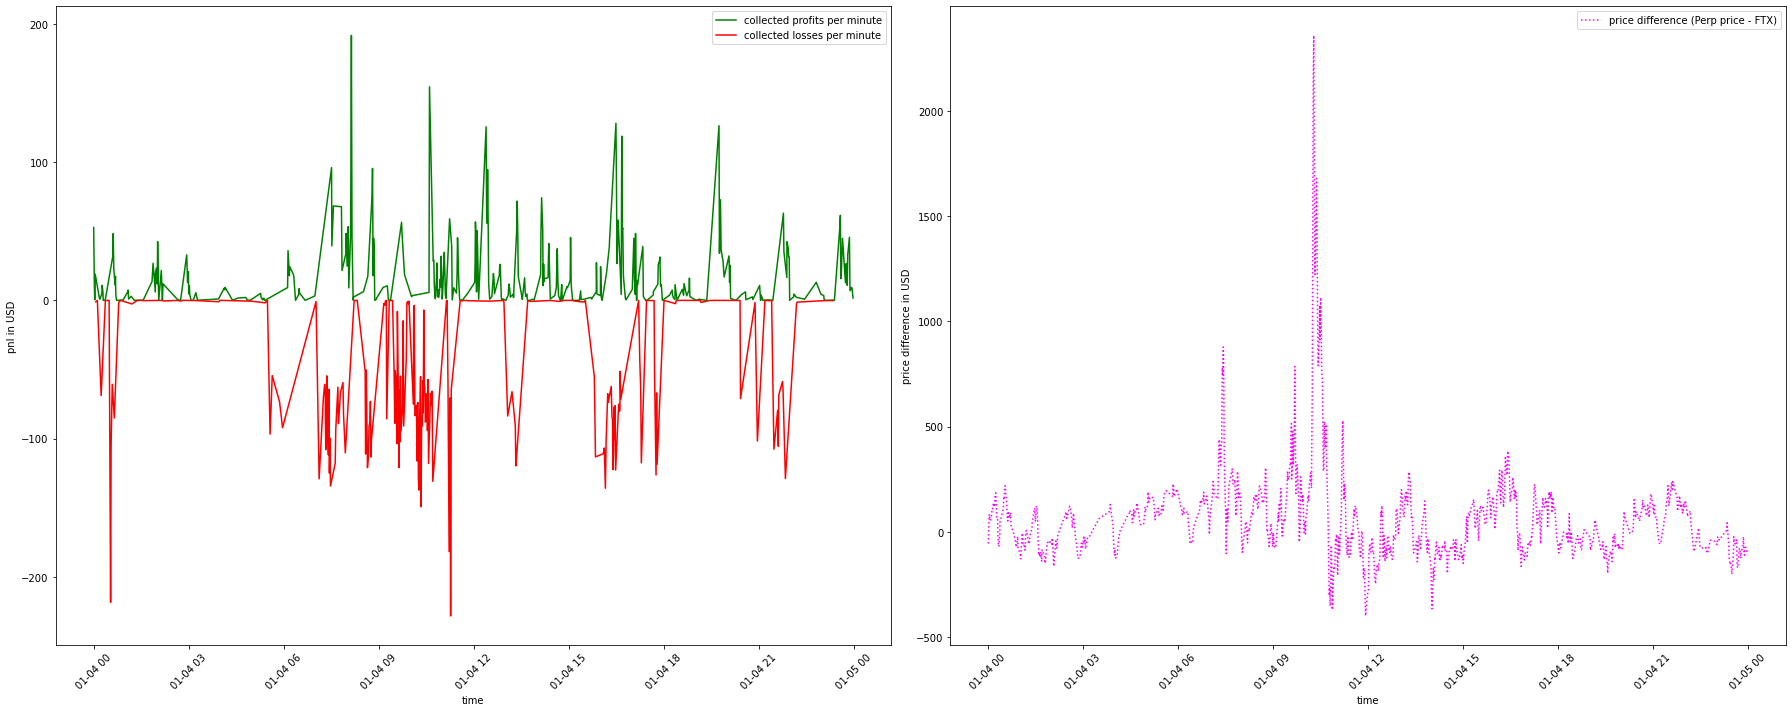

In [39]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 1, 5)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 1, 4))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 1, 4)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 1, 5))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 1, 5)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 1, 4))], 
                                  "BTC", separate_plots=True)

### February

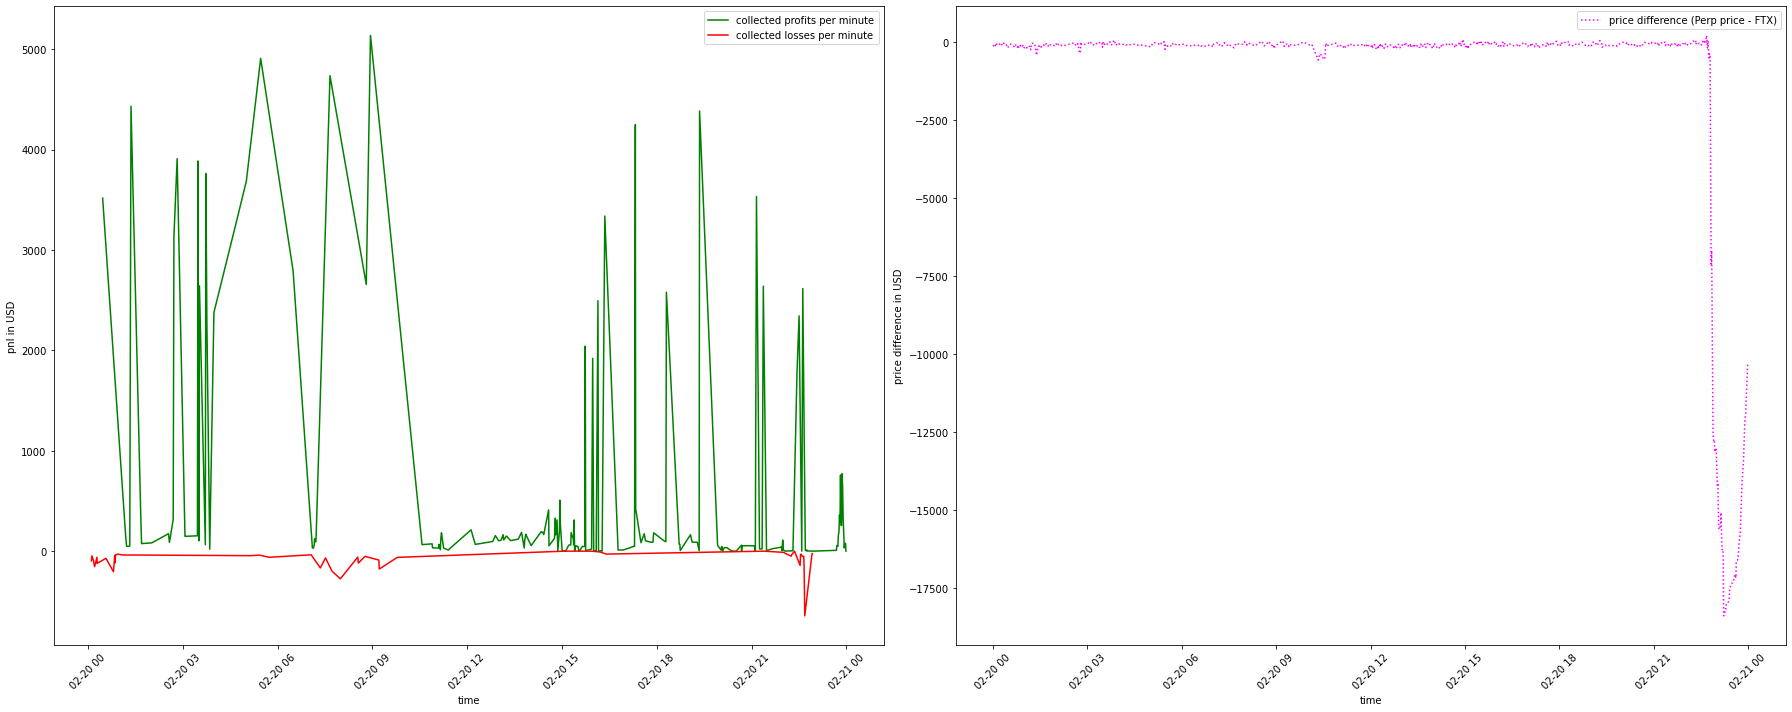

In [40]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 21)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 20))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 20)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 21))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 21)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 20))], 
                                  "BTC", separate_plots=True)

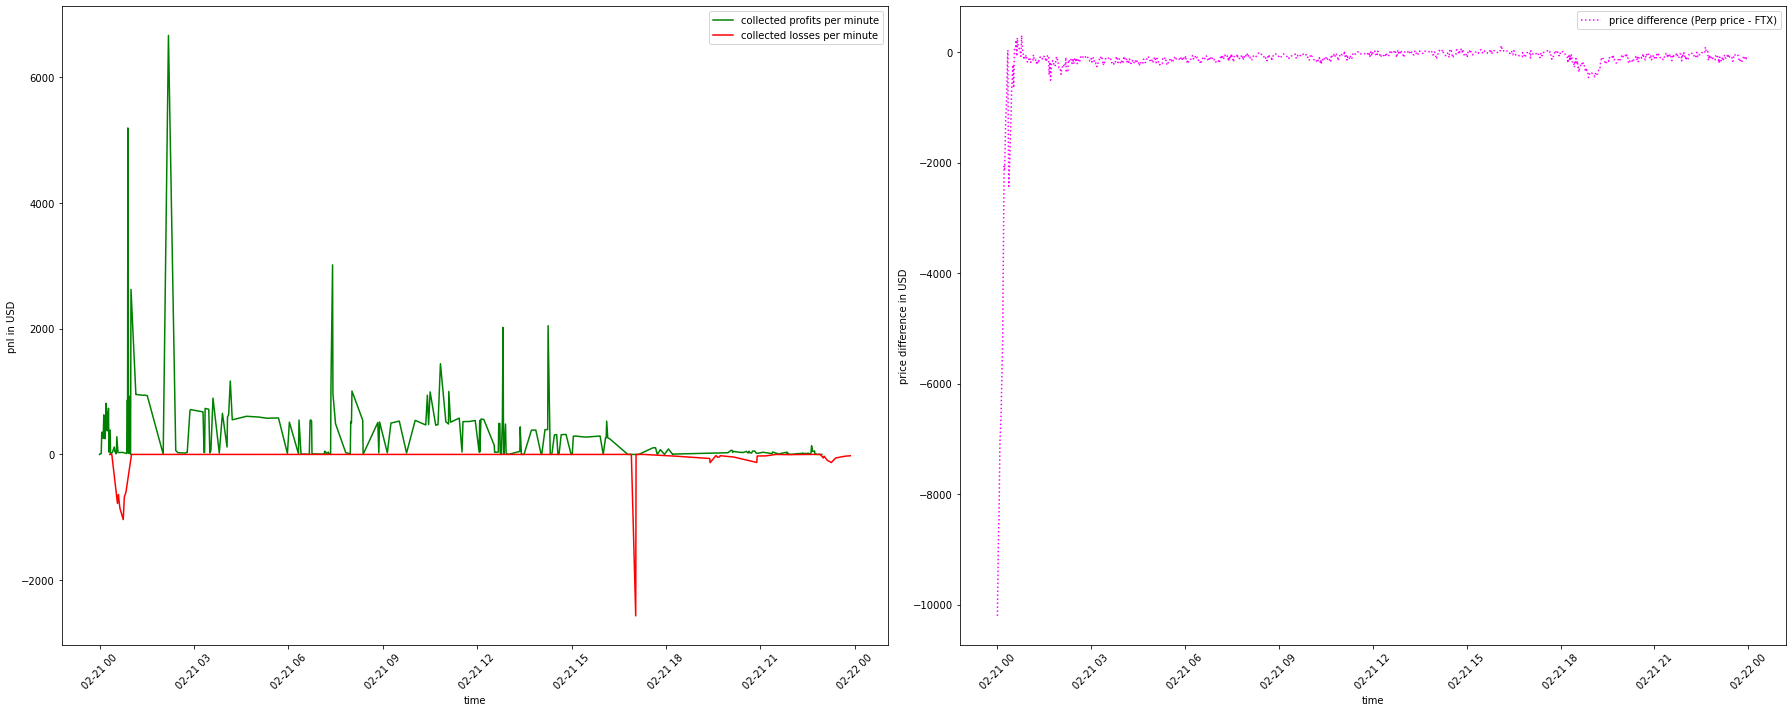

In [41]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 21))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 21)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 22))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 22)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 21))], 
                                  "BTC", separate_plots=True)

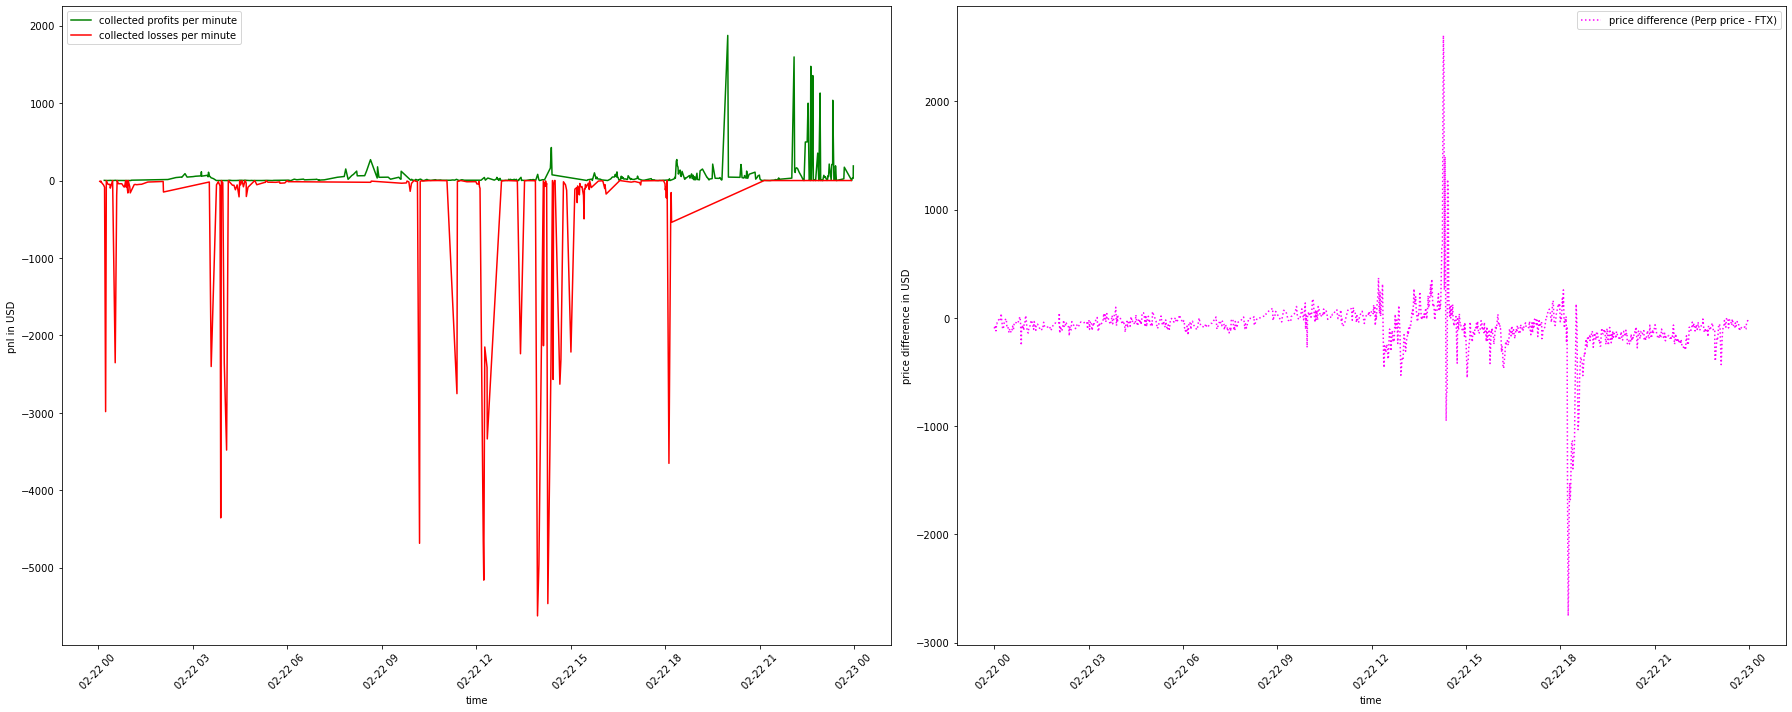

In [42]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 23)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 22))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 22)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 23))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 23)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 22))], 
                                  "BTC", separate_plots=True)

### March

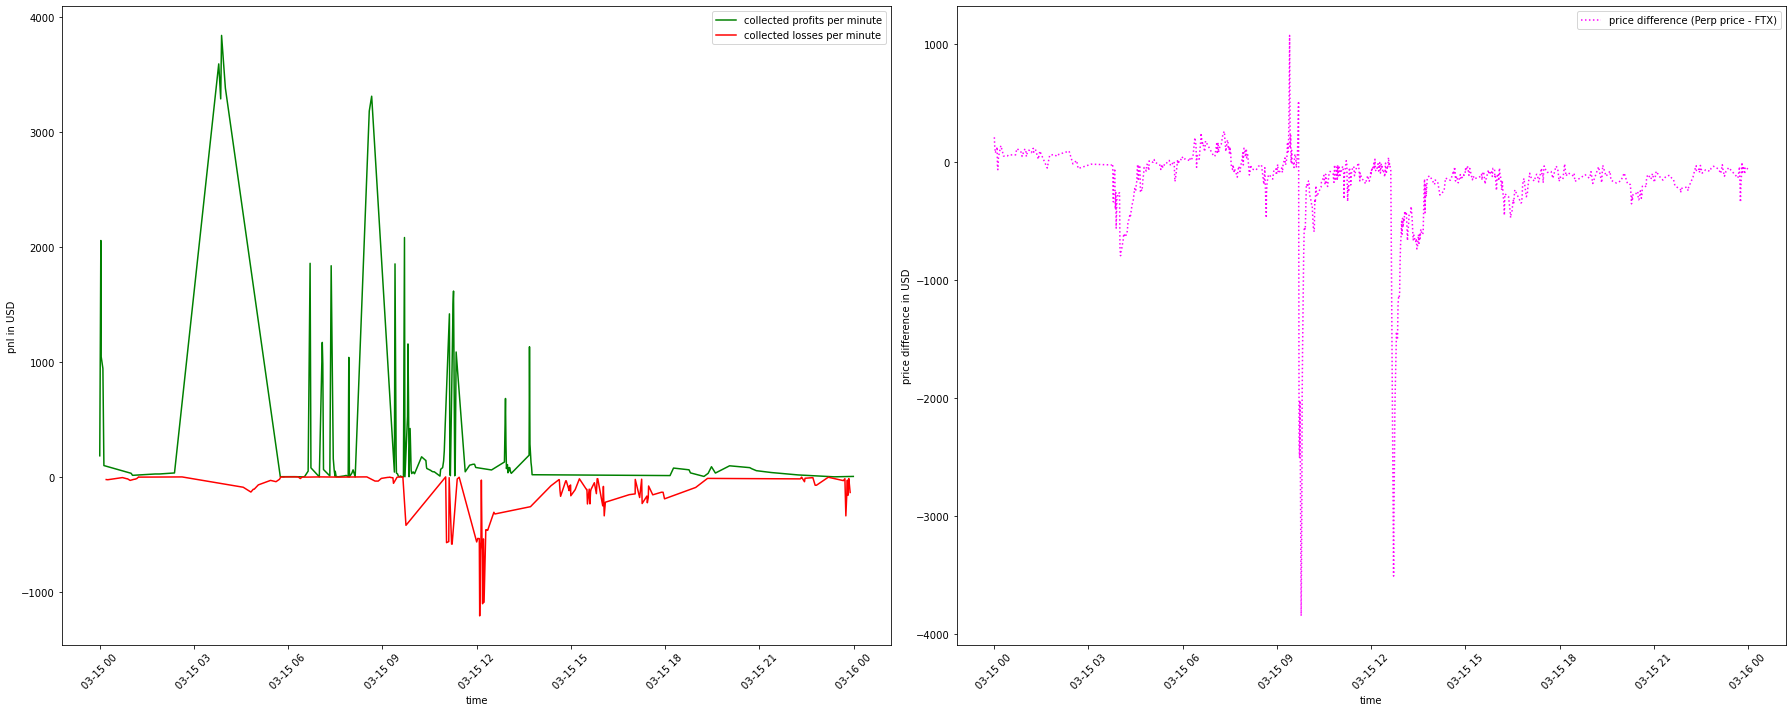

In [43]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 3, 16)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 3, 15))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 3, 15)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 3, 16))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 3, 16)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 3, 15))], 
                                  "BTC", separate_plots=True)

### April

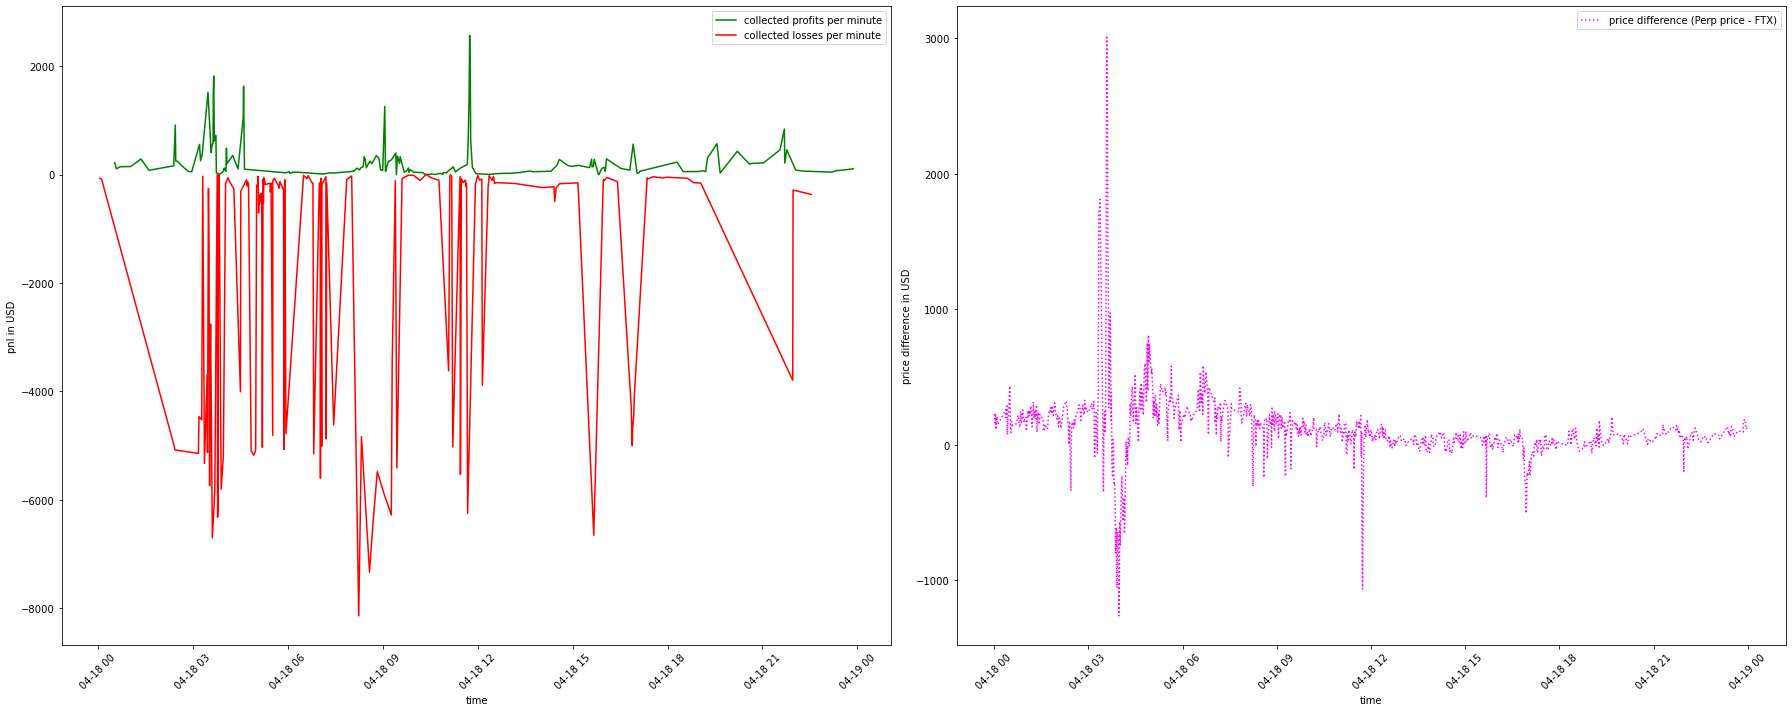

In [44]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 4, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 4, 18))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 4, 18)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 4, 19))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 4, 19)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 4, 18))], 
                                  "BTC", separate_plots=True)

### May

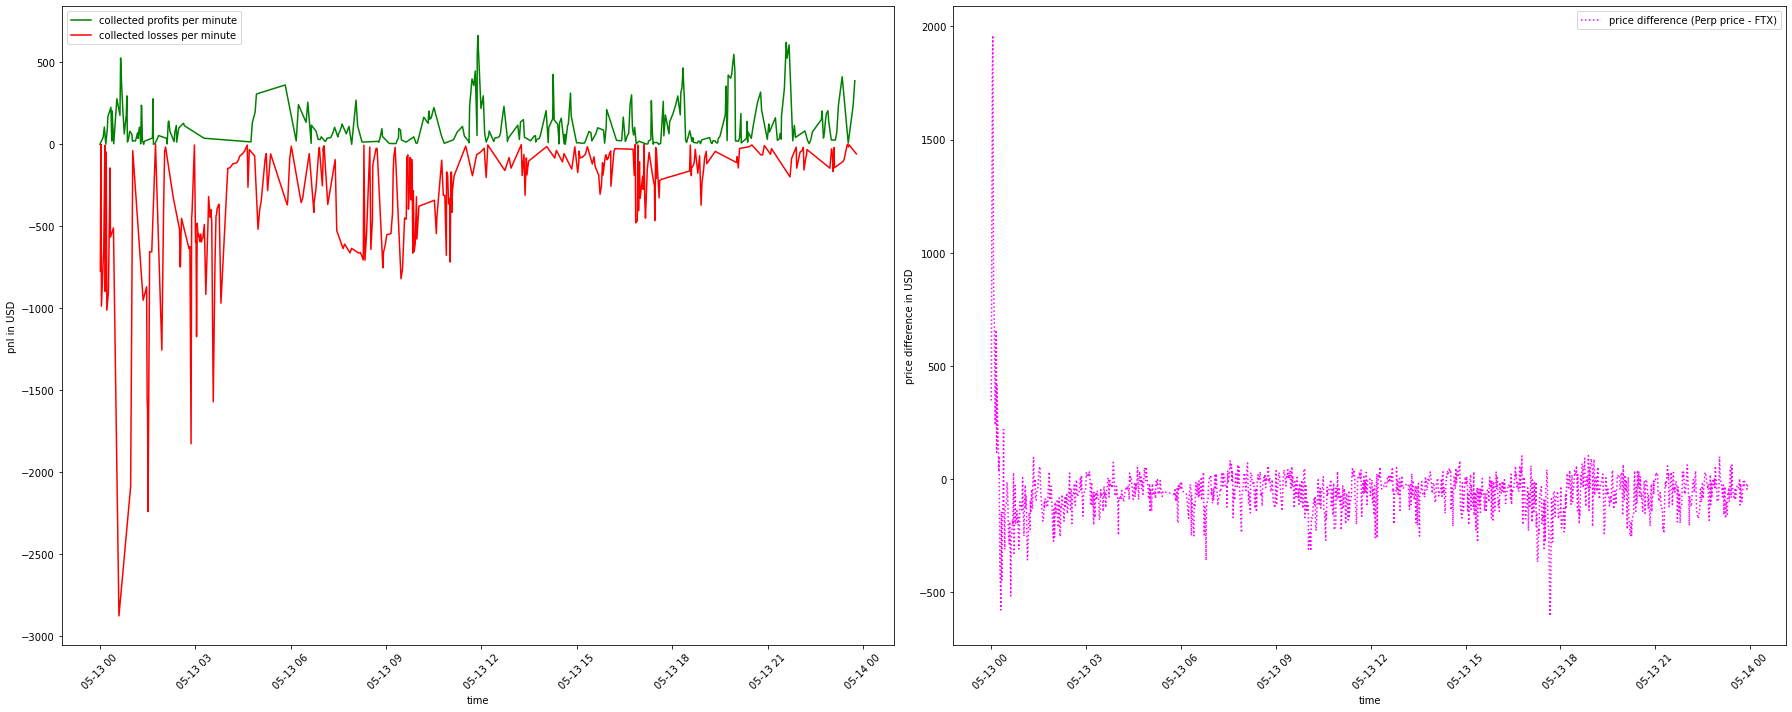

In [45]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 14)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 13))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 5, 13)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 5, 14))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 5, 14)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 5, 13))], 
                                  "BTC", separate_plots=True)

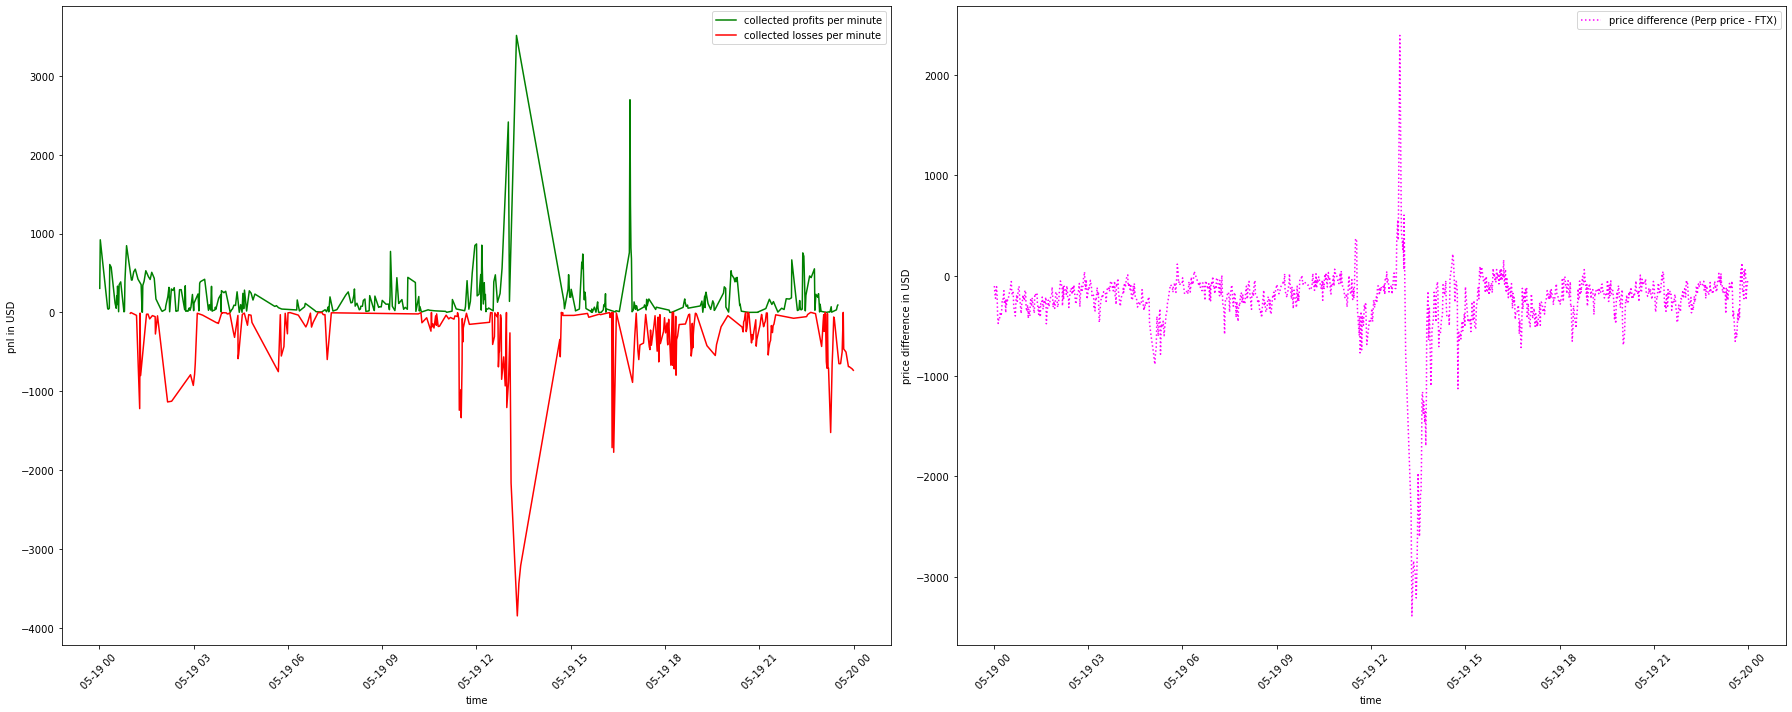

In [46]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 5, 19))], 
                                  "BTC", separate_plots=True)

### September

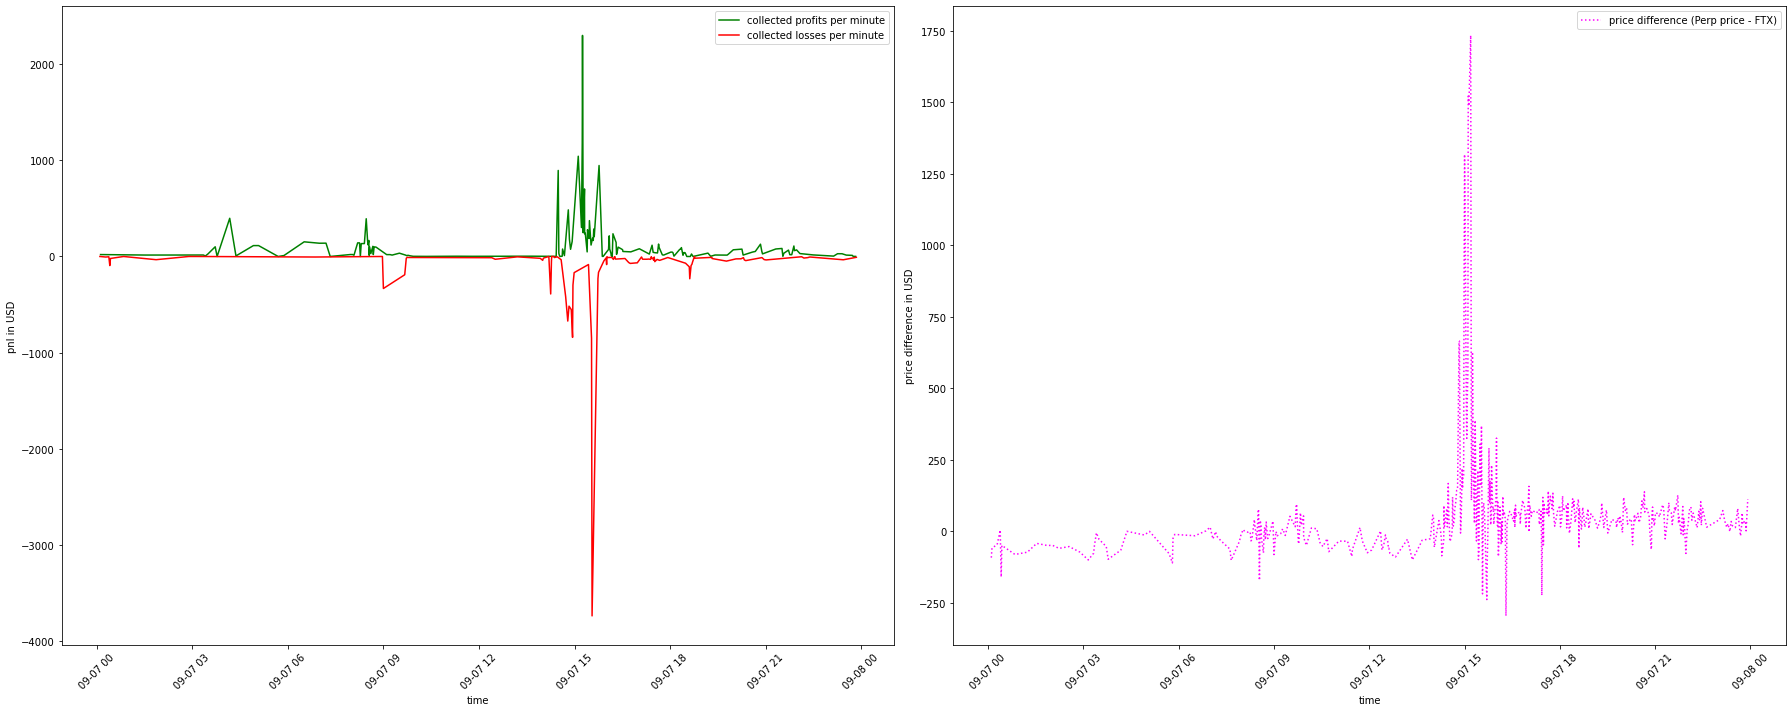

In [47]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 8)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 7))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 9, 7)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 9, 8))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 9, 8)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 9, 7))], 
                                  "BTC", separate_plots=True)

### October

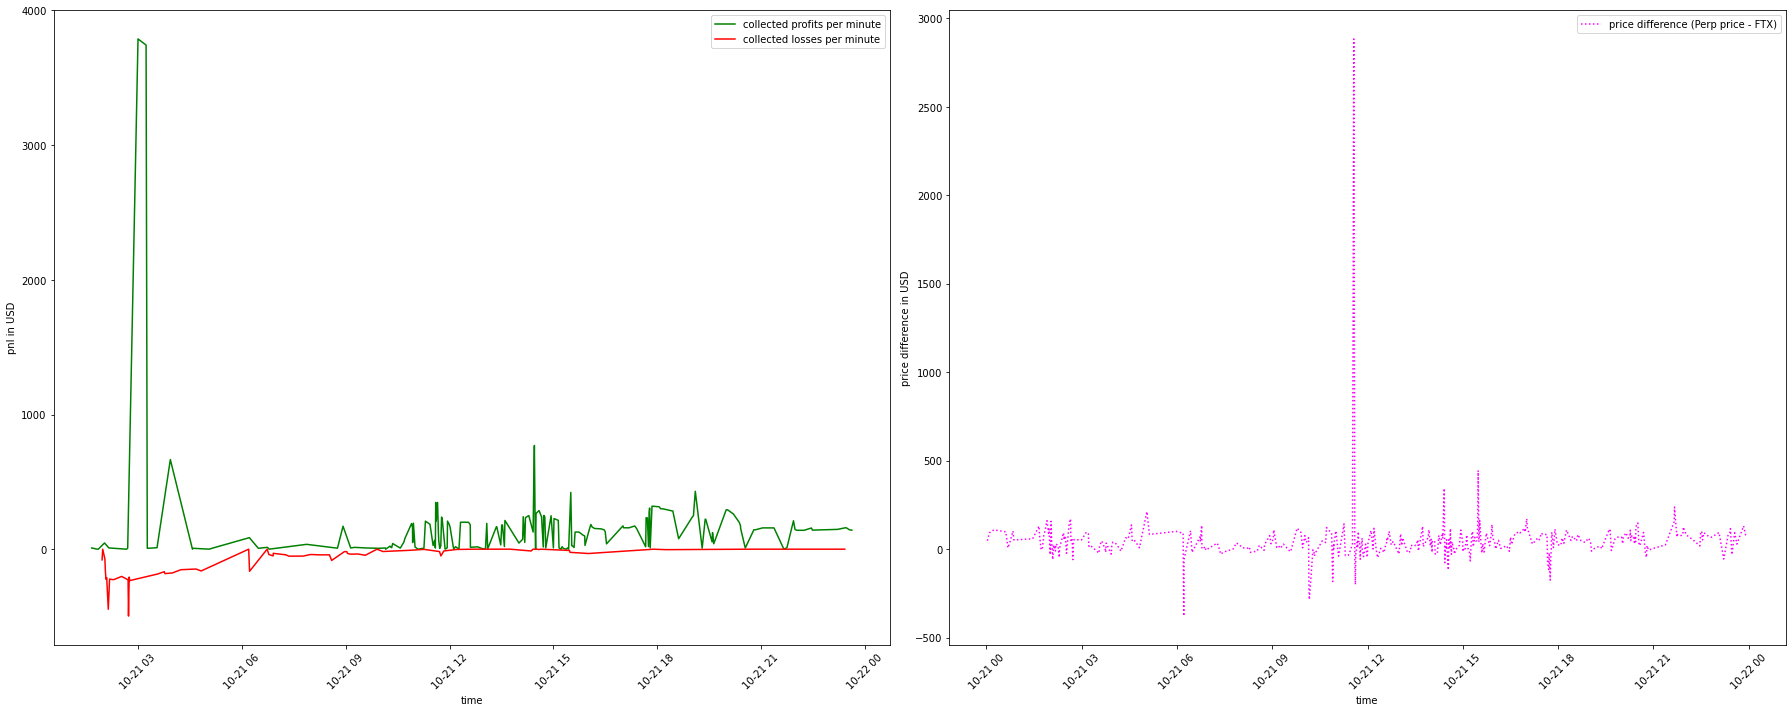

In [48]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 21))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 10, 21)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 10, 22))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 10, 22)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 10, 21))], 
                                  "BTC", separate_plots=True)

### December

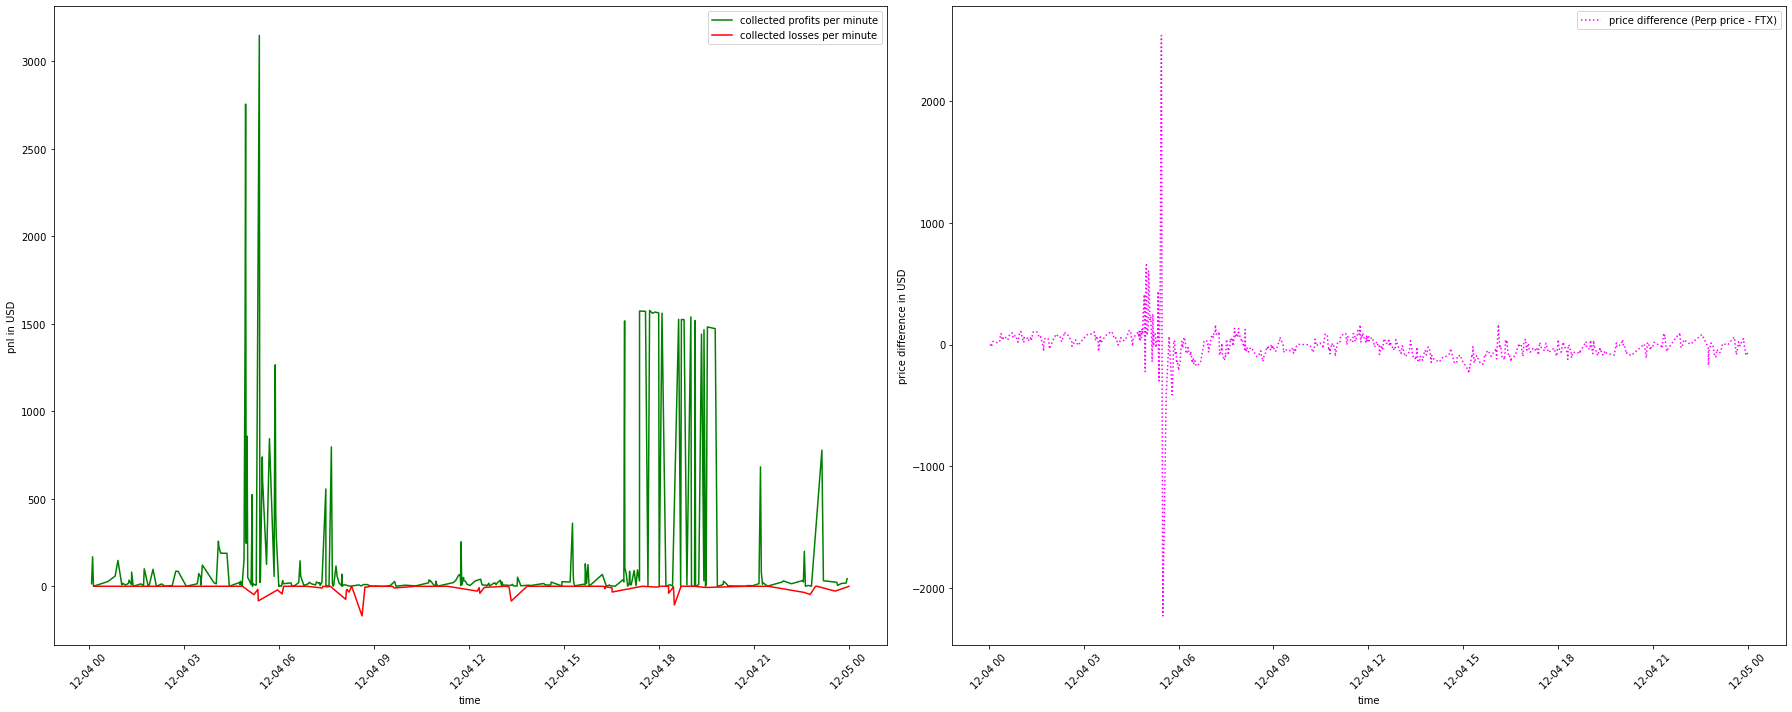

In [49]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 12, 5)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 12, 4))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 12, 4)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 12, 5))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 12, 5)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 12, 4))], 
                                  "BTC", separate_plots=True)

## ETH

### April

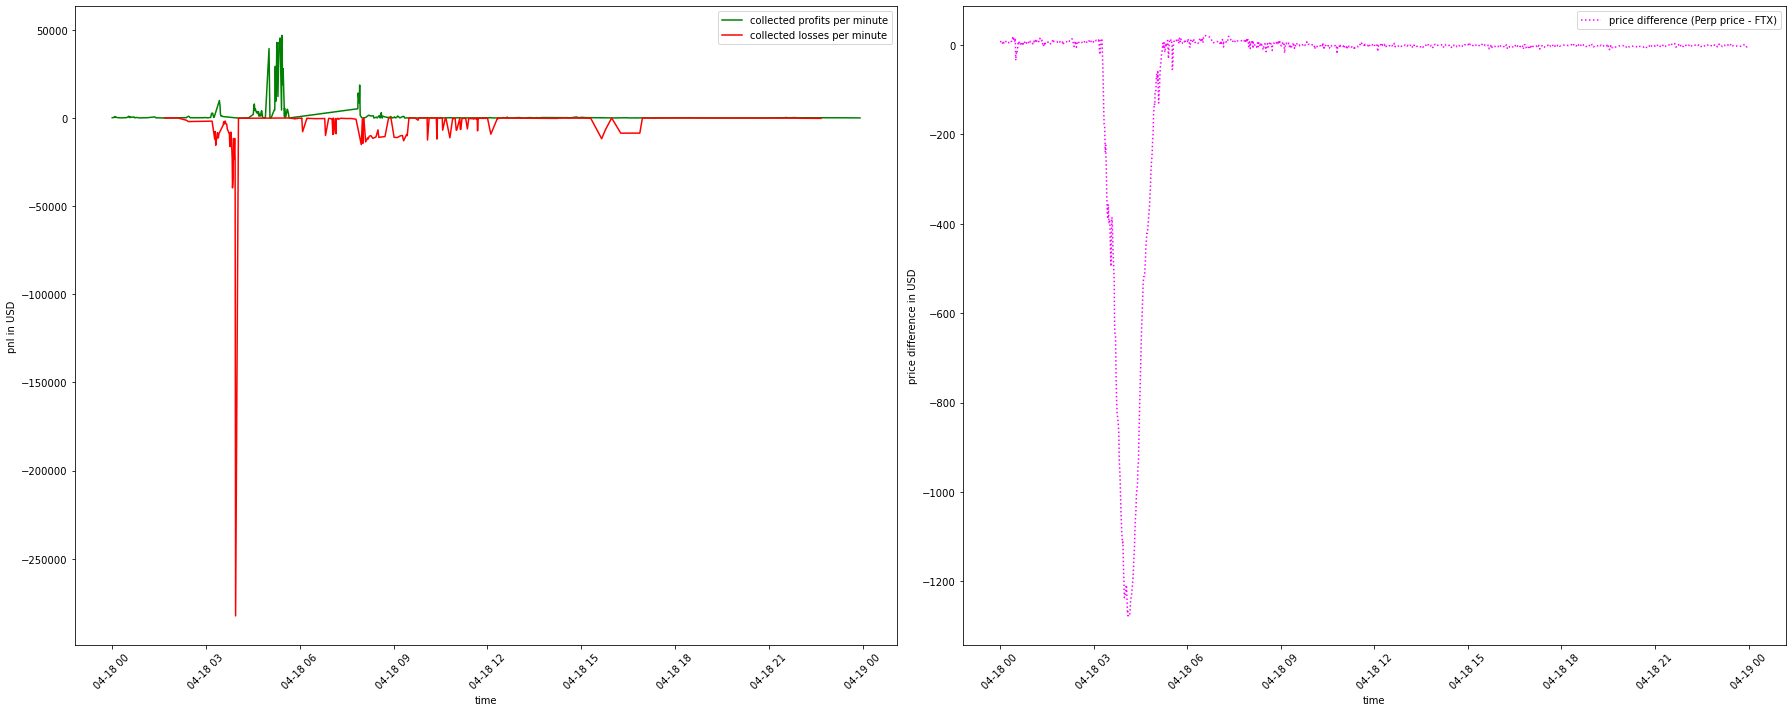

In [50]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 4, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 4, 18))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 4, 18)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 4, 19))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 4, 19)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 4, 18))], 
                                  "ETH", separate_plots=True)

### May

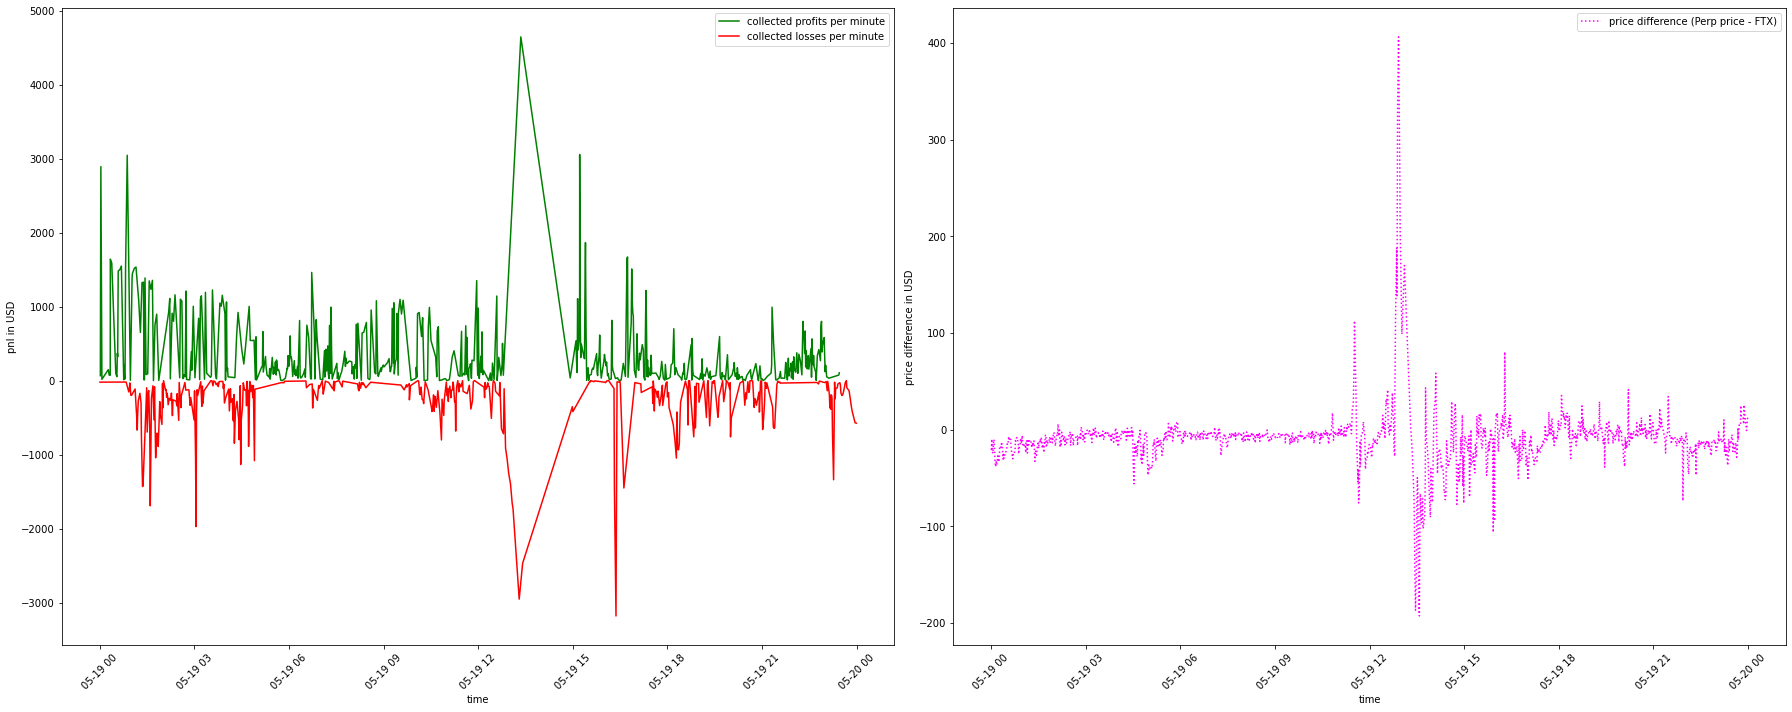

In [51]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 5, 19))], 
                                  "ETH", separate_plots=True)

### September

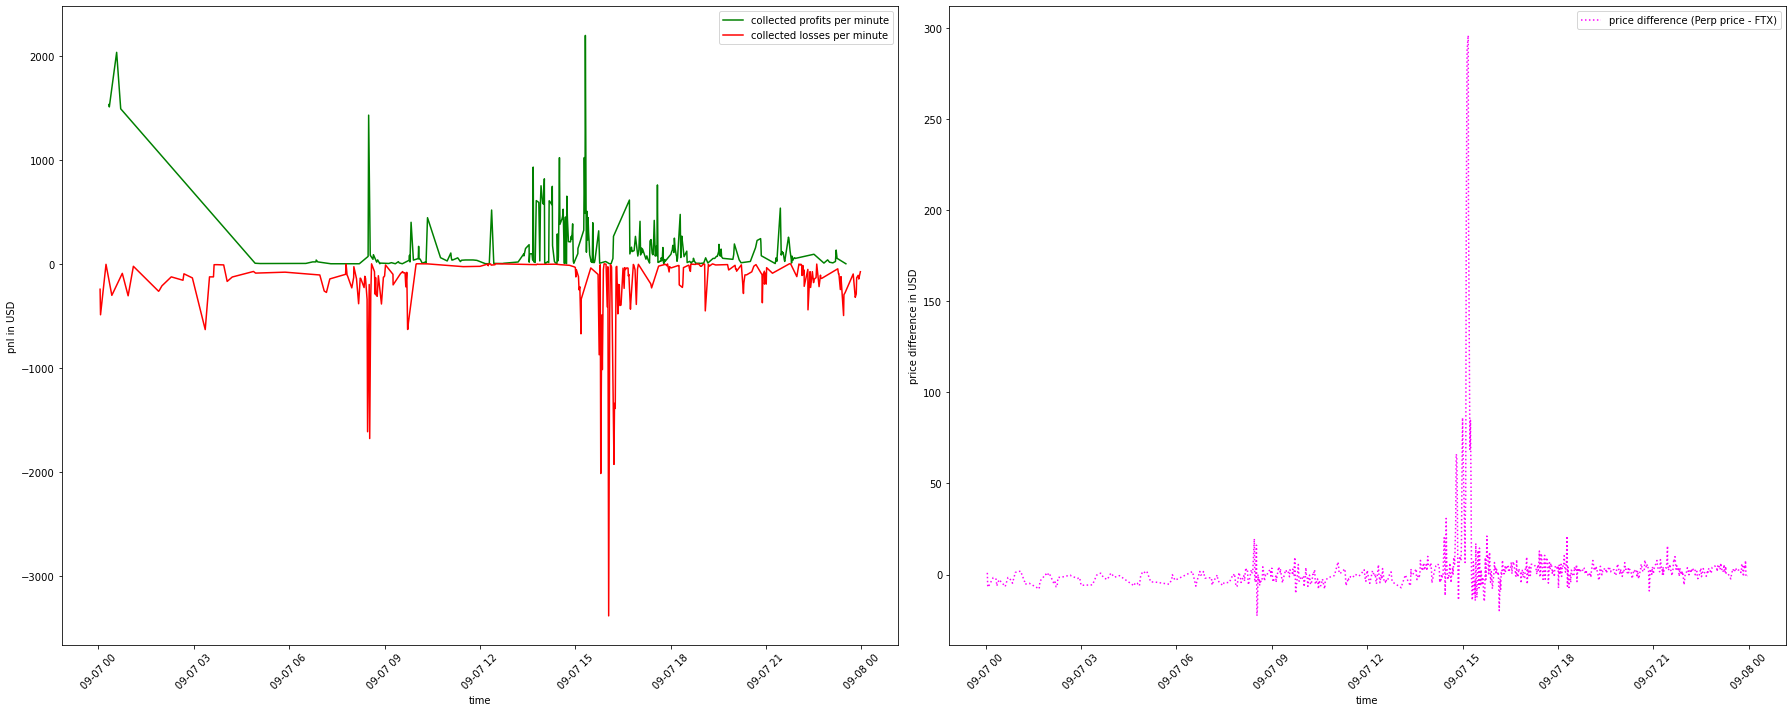

In [52]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 8)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 7))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 9, 7)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 9, 8))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 9, 8)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 9, 7))], 
                                  "ETH", separate_plots=True)

### October

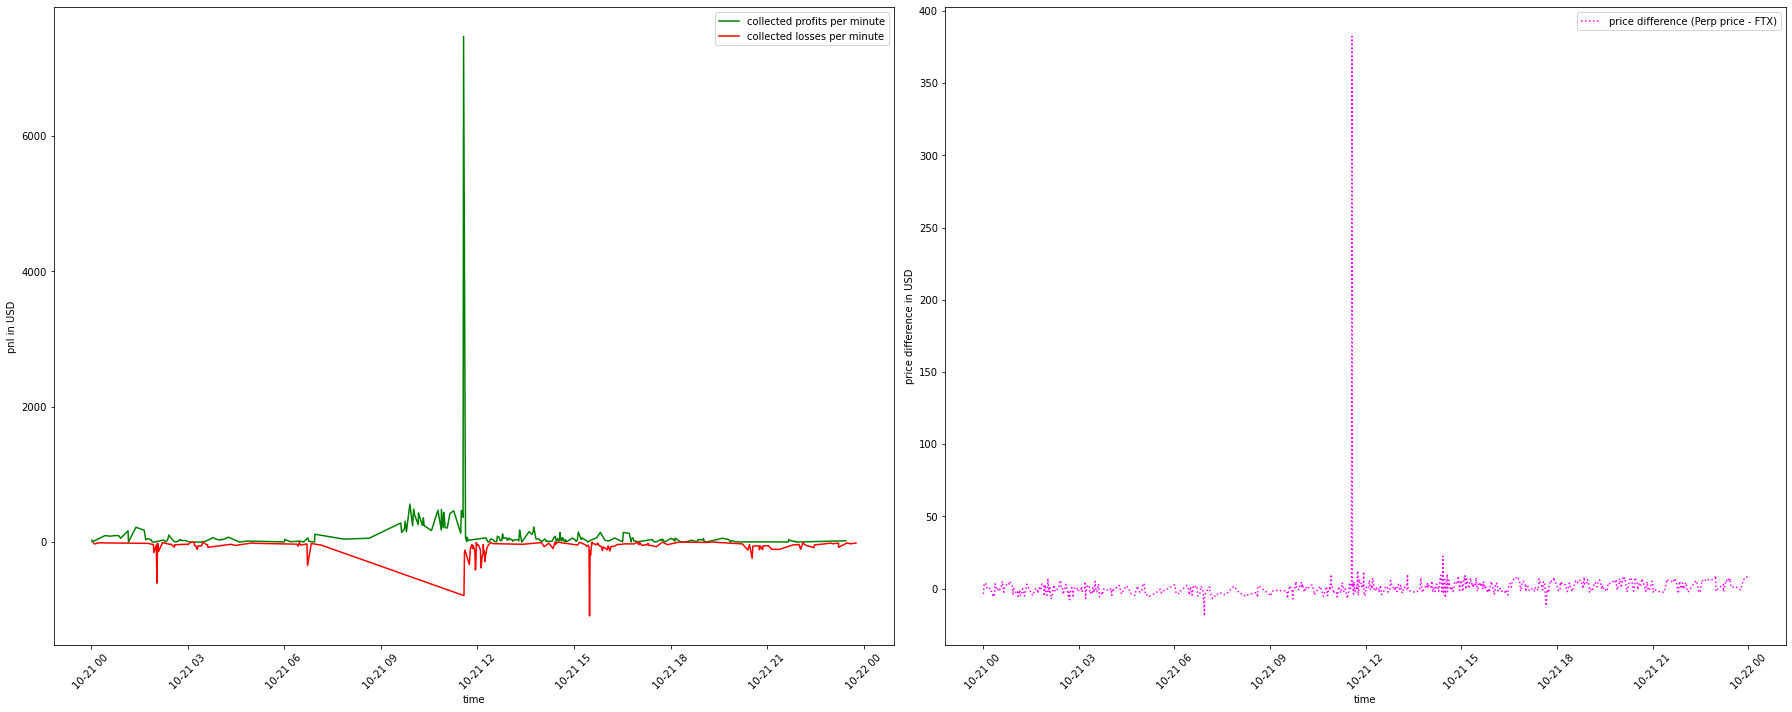

In [53]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 21))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 10, 21)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 10, 22))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 10, 22)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 10, 21))], 
                                  "ETH", separate_plots=True)

## PERP

### May

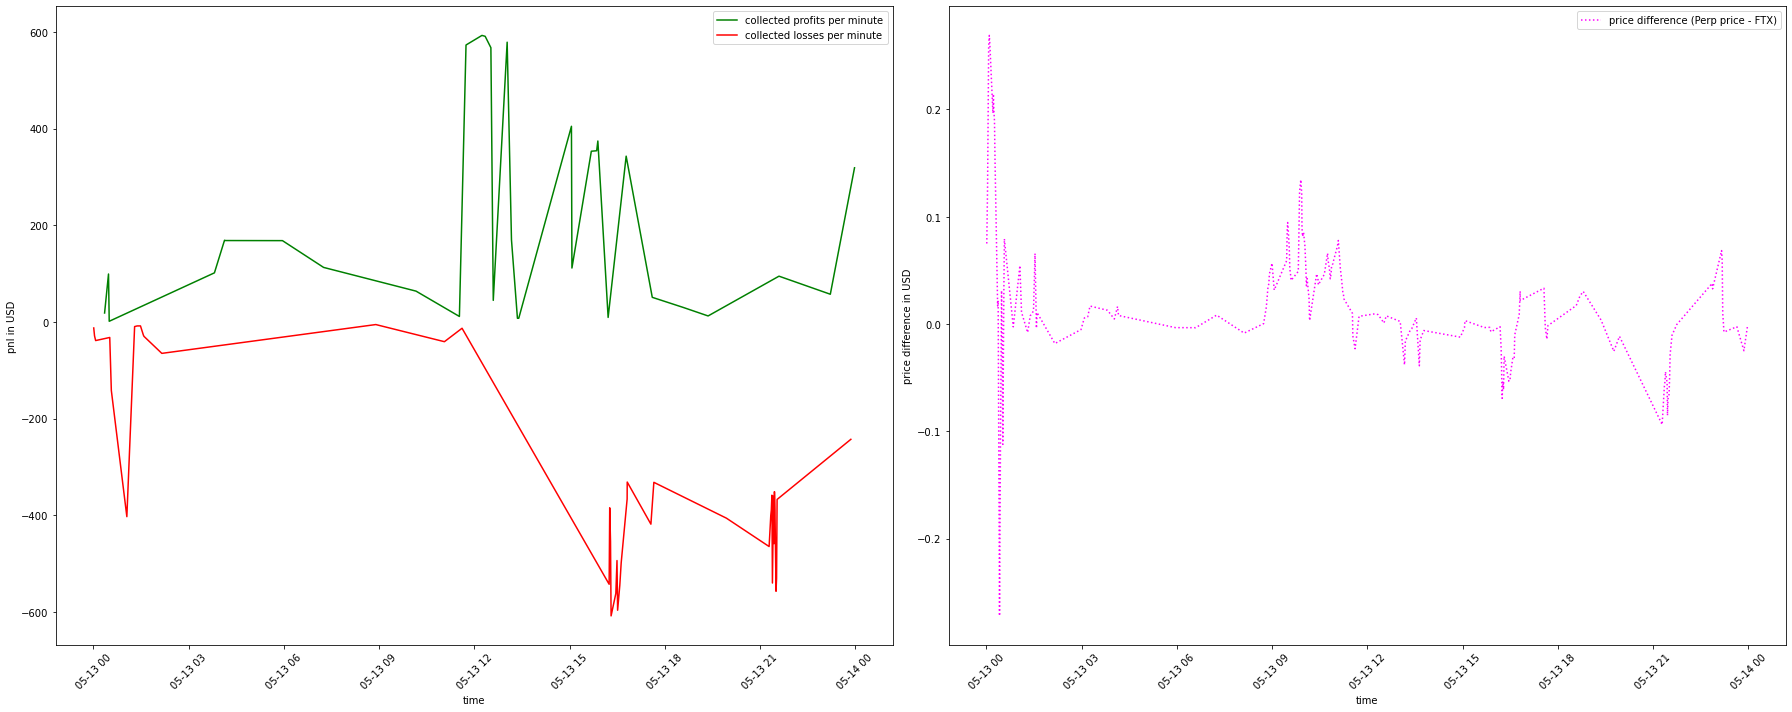

In [54]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 14)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 13))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 13)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 14))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 14)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 13))], 
                                  "PERP", separate_plots=True)

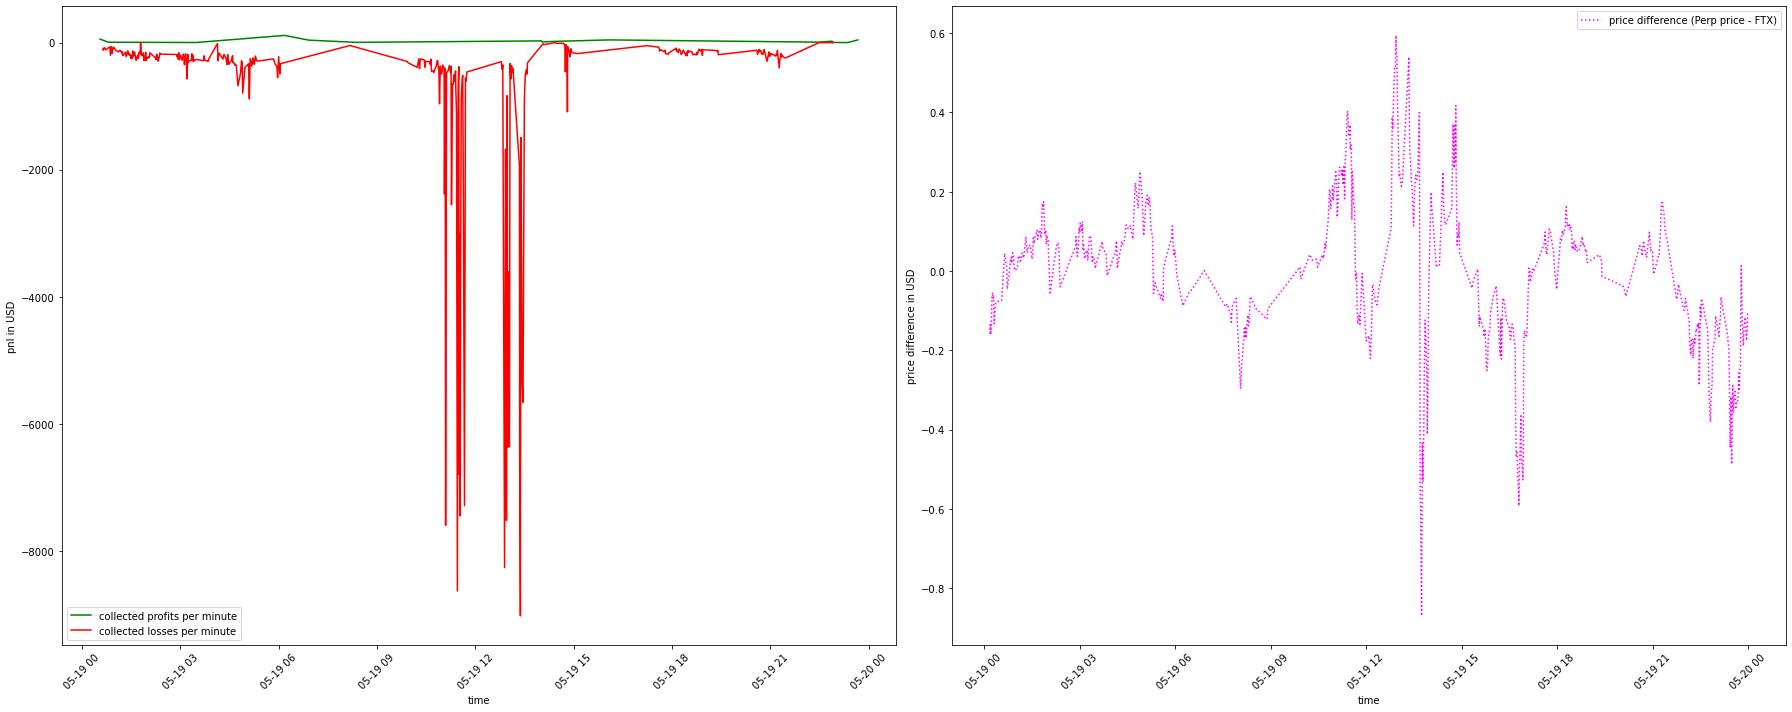

In [55]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 19))], 
                                  "PERP", separate_plots=True)

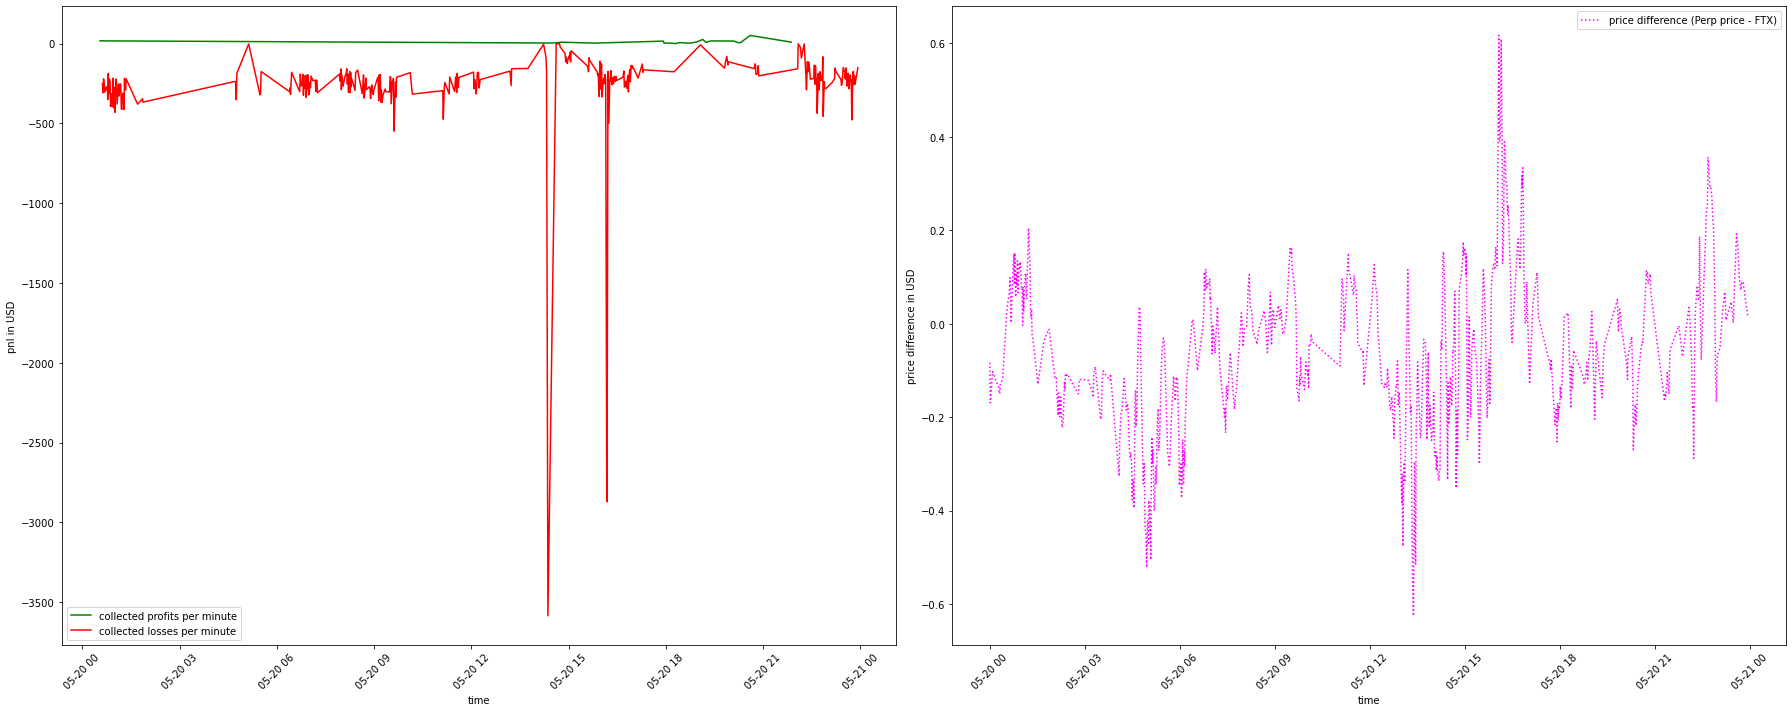

In [56]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 21)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 20))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 20)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 21))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 21)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 20))], 
                                  "PERP", separate_plots=True)

### August

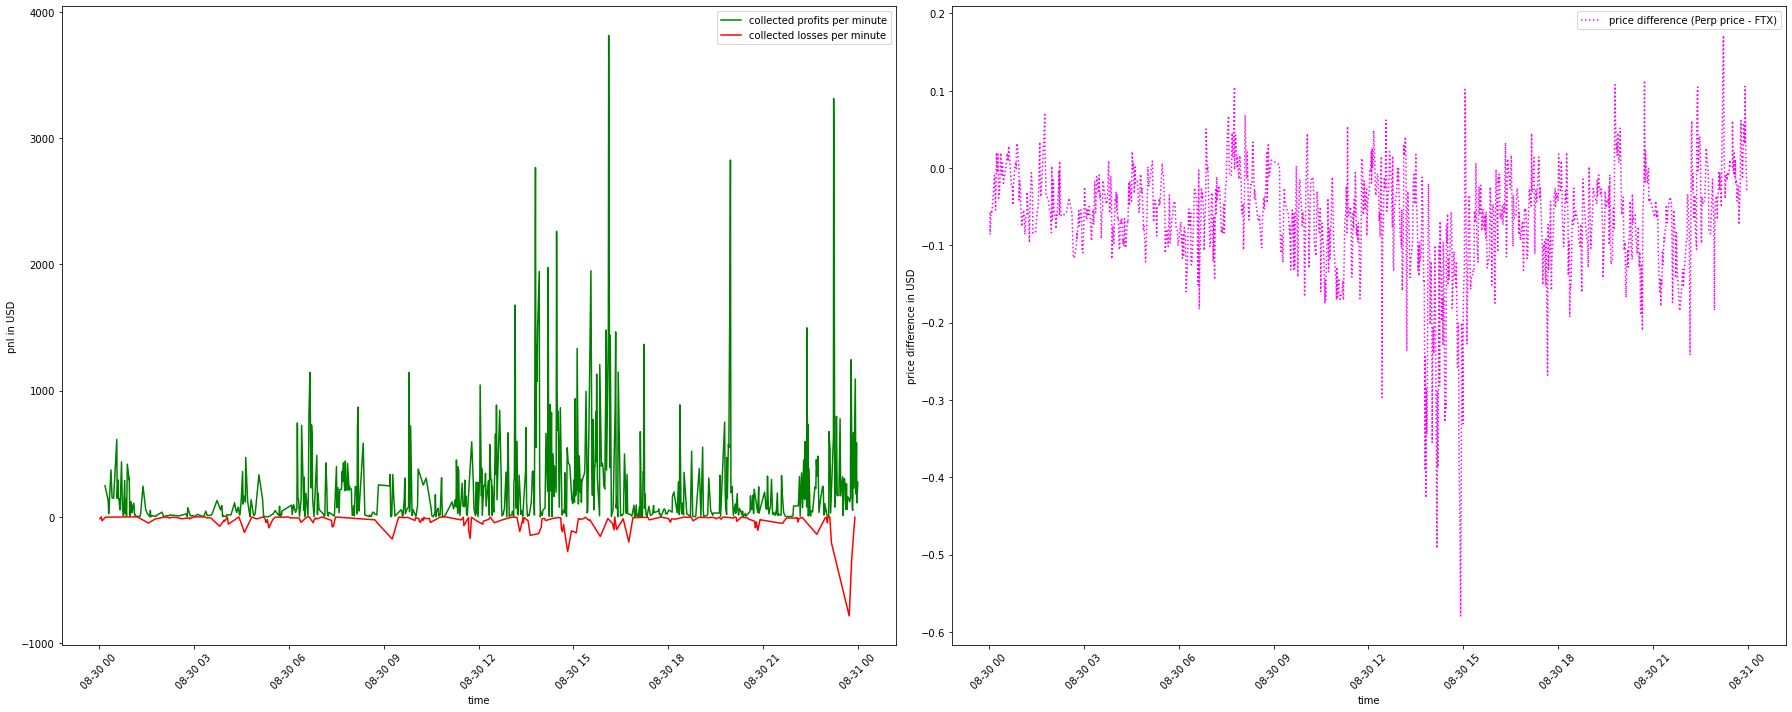

In [57]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 8, 31)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 8, 30))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 8, 30)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 8, 31))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 8, 31)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 8, 30))], 
                                  "PERP", separate_plots=True)

### September

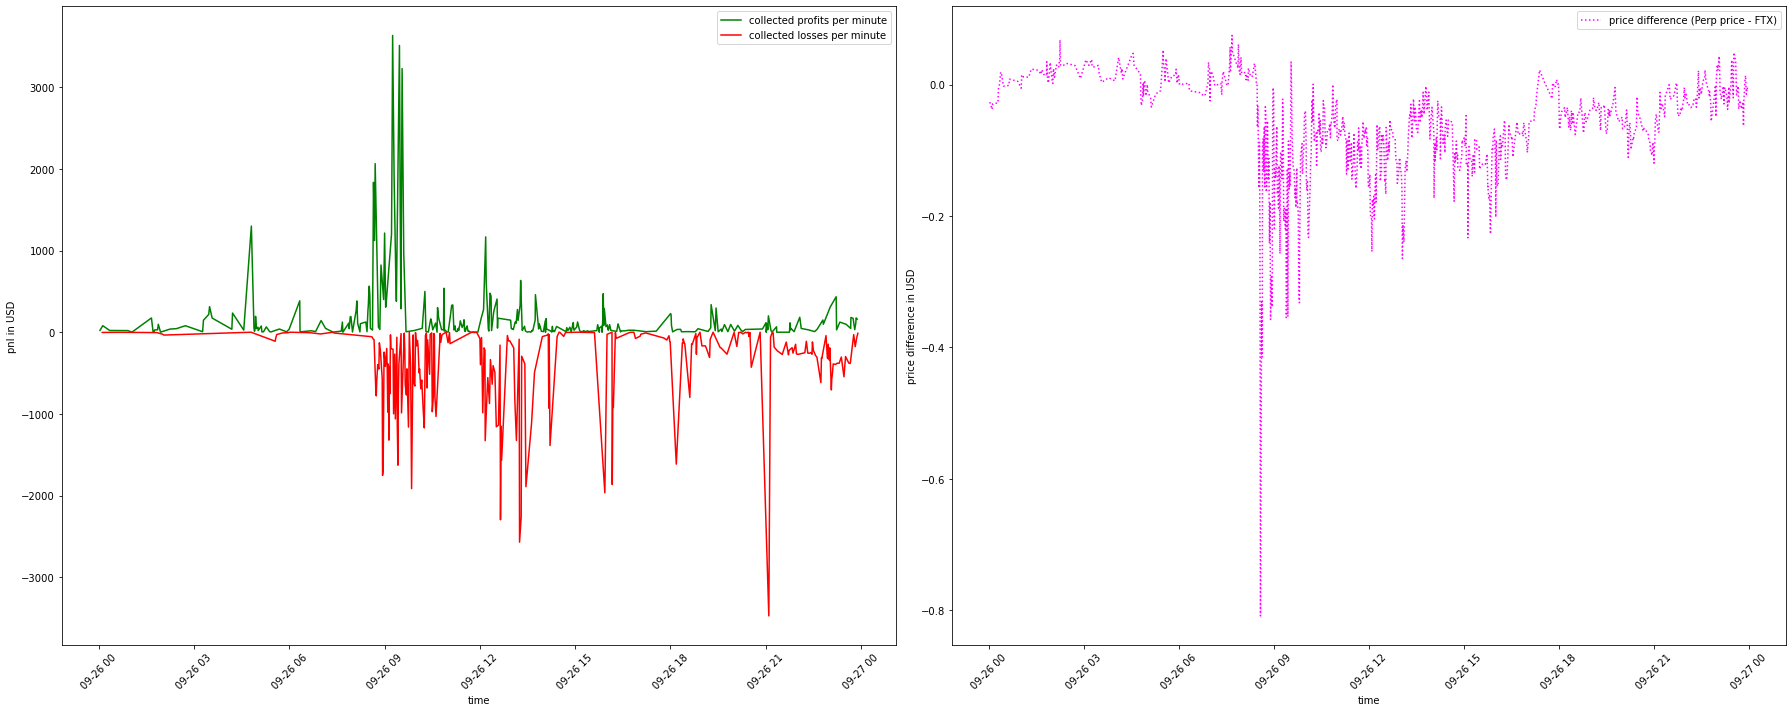

In [58]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 27)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 26))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 9, 26)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 9, 27))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 9, 27)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 9, 26))], 
                                  "PERP", separate_plots=True)

### October

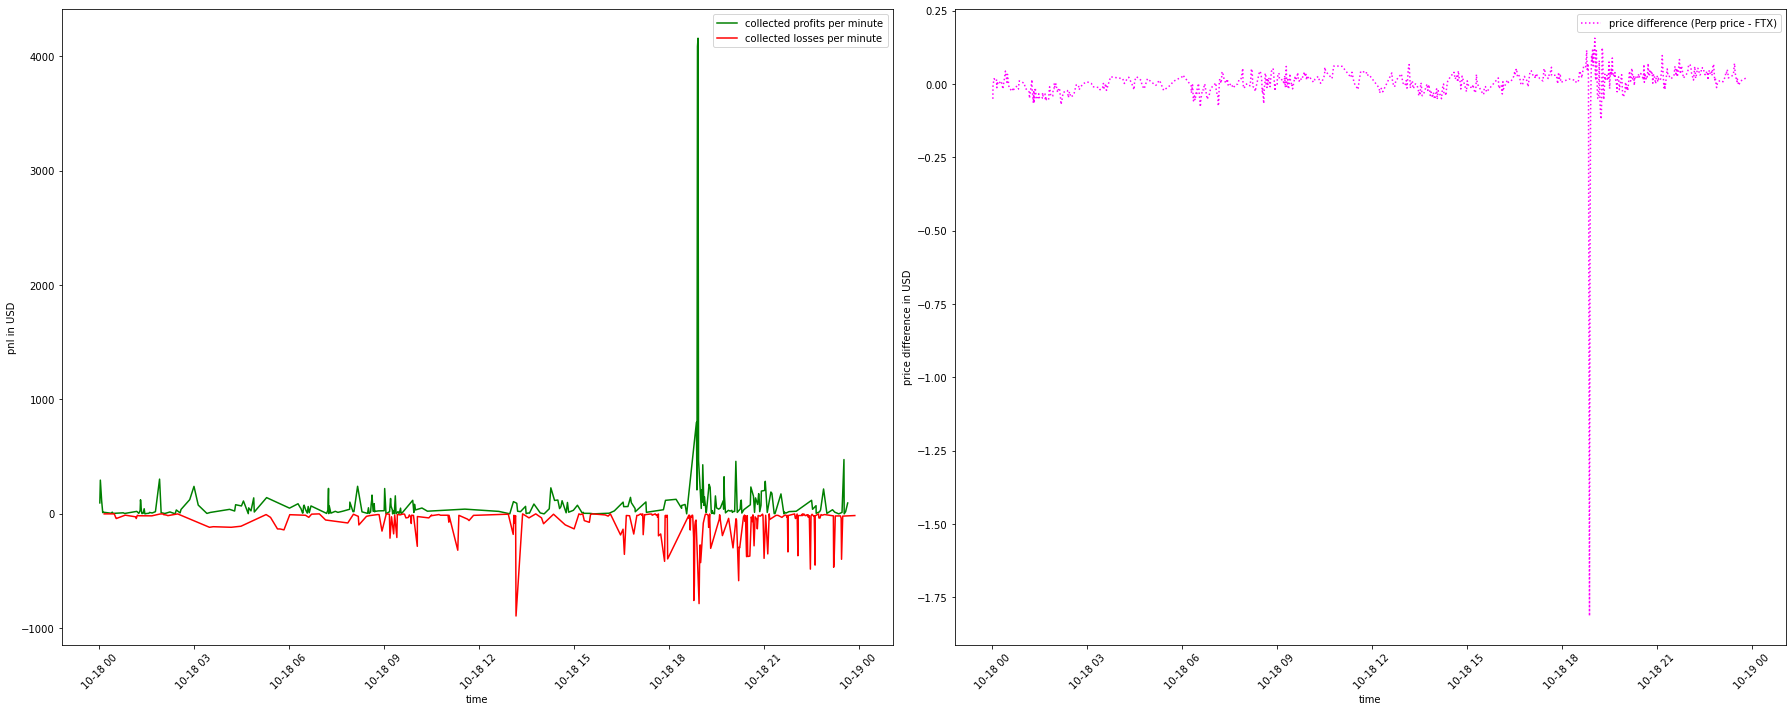

In [59]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 18))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 10, 18)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 10, 19))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 10, 19)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 10, 18))], 
                                  "PERP", separate_plots=True)

### November

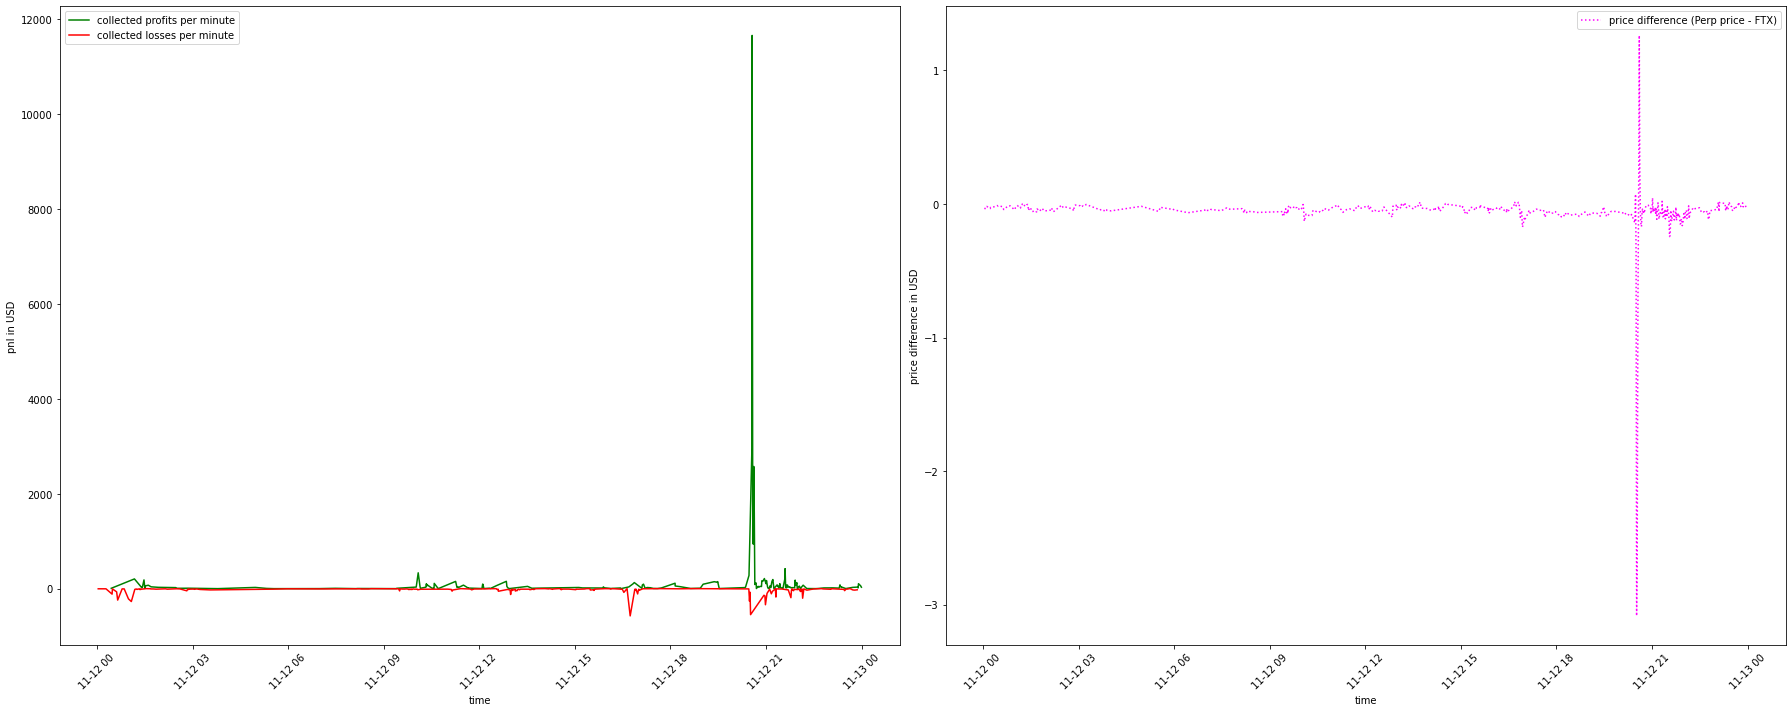

In [60]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 11, 13)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 11, 12))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 11, 12)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 11, 13))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 11, 13)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 11, 12))], 
                                  "PERP", separate_plots=True)